In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math

### This file is submitted by co23btech11024
### Explanations and observations are present in markdown cells of this file
### q_p denotes q of question p (u_2 denotes u of question 2 ...)

## Question 1

In [87]:
# Initial condition
def triangular_pulse_initial(x_1,x0,h0,w0_1):
    a=abs(x_1-x0)
    if a<=w0_1/2 and x_1>=x0:
        return -2*h0*(x_1-(x0+w0_1/2))/w0_1
    elif a<=w0_1/2 and x_1<x0:
        return 2*h0*(x_1-(x0-w0_1/2))/w0_1
    else:
        return 0

alpha_1 = 1
x0_1 = 0.5
h0_1 = 1
w0_1 = 0.05

### Part A

#### I) FTBS

##### Numerical damping is not present for c=1 in FTBS

In [74]:
dx_1 = [0.0005, 0.001]
c_1 = 1

##### Each plot contains graph of 10 time instants, scroll down to see plots at different time instants
##### See at end for Exact vs Numerical solution comparison graph

dx = 0.0005


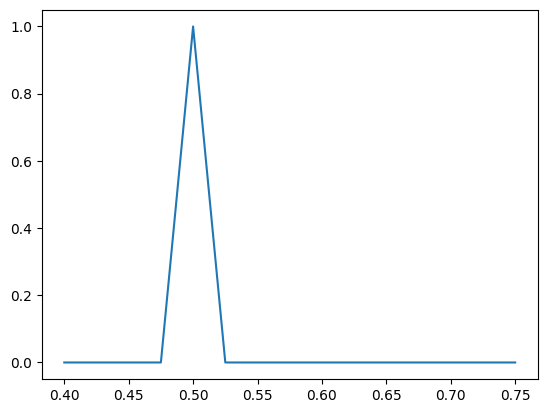

10


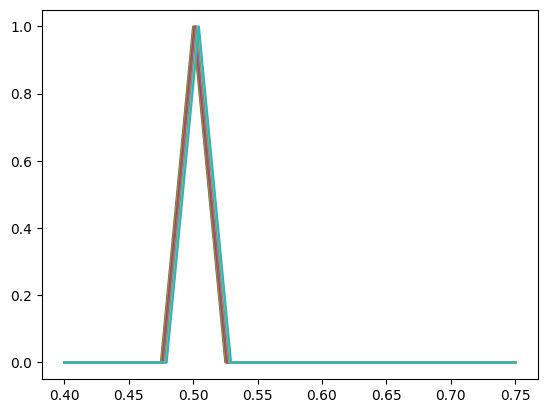

20


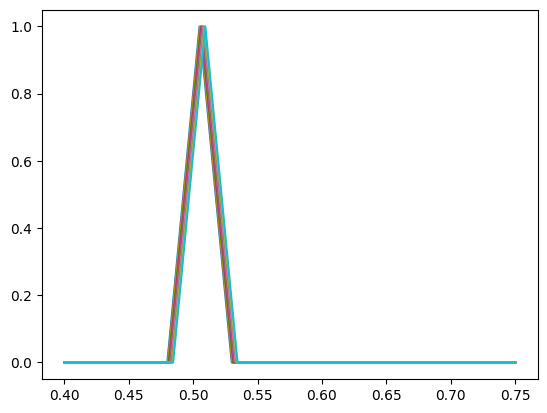

30


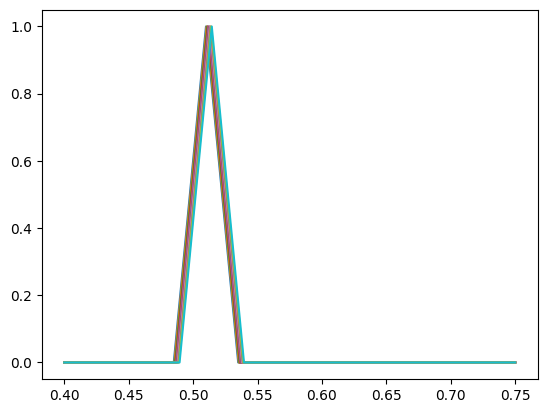

40


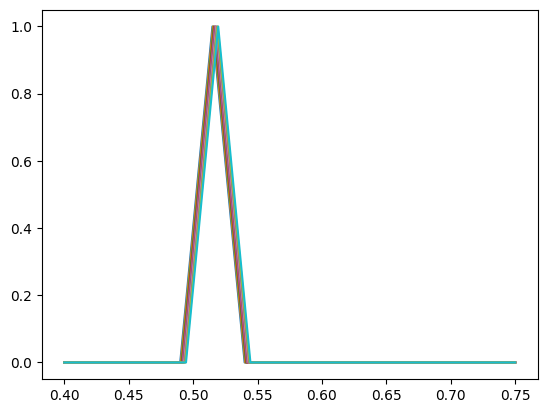

50


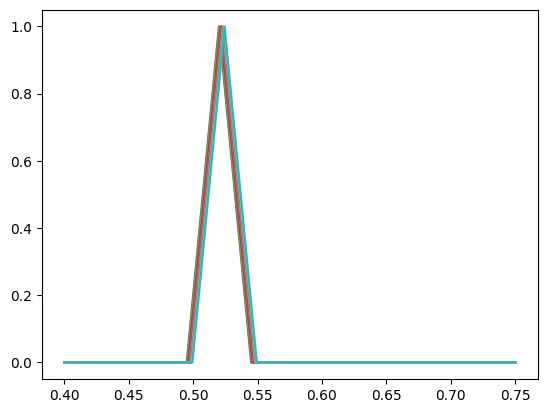

60


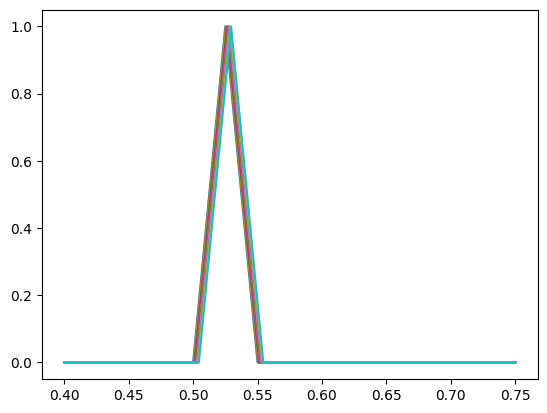

70


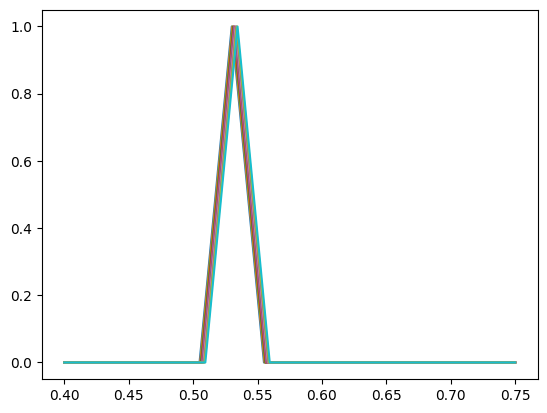

80


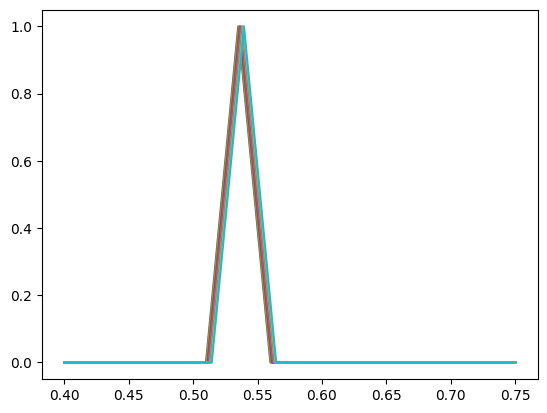

90


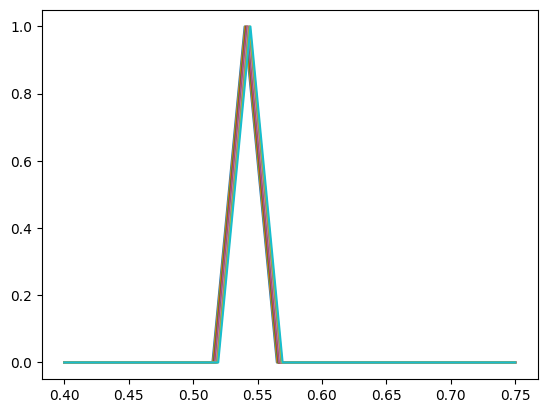

100


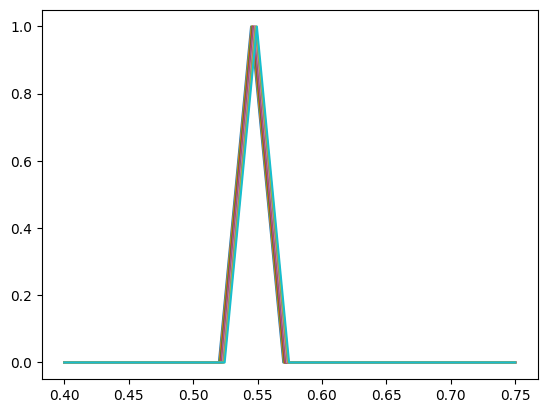

110


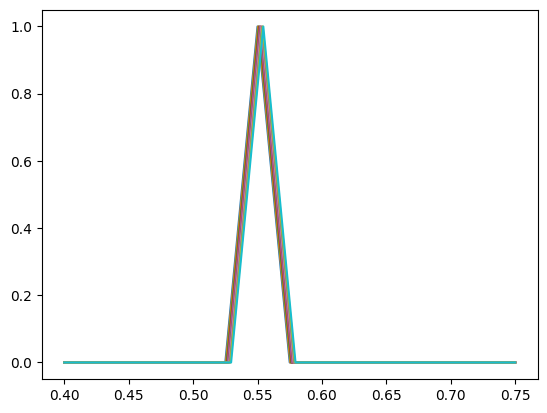

120


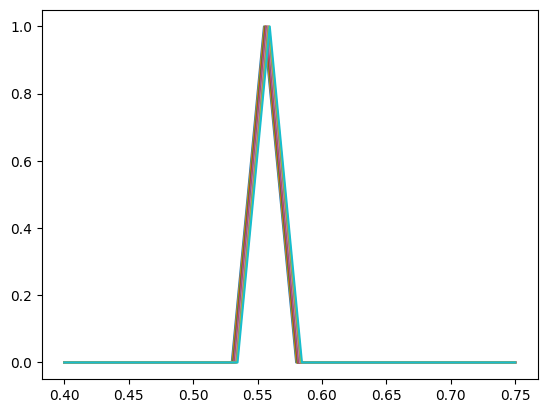

130


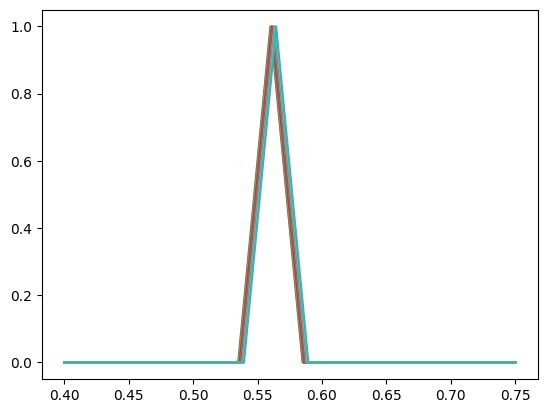

140


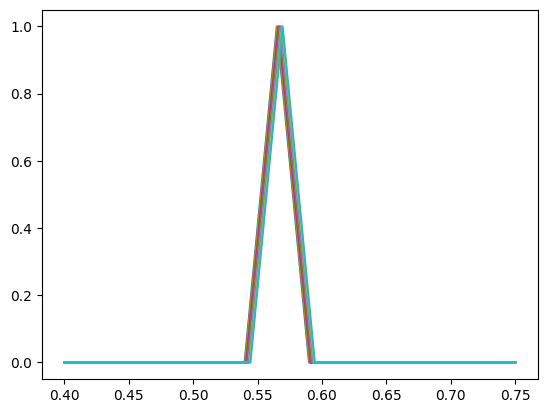

150


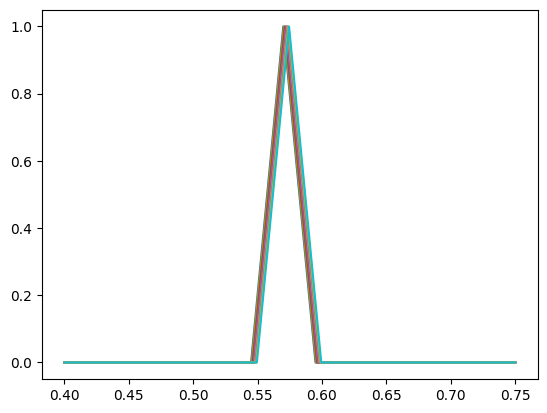

160


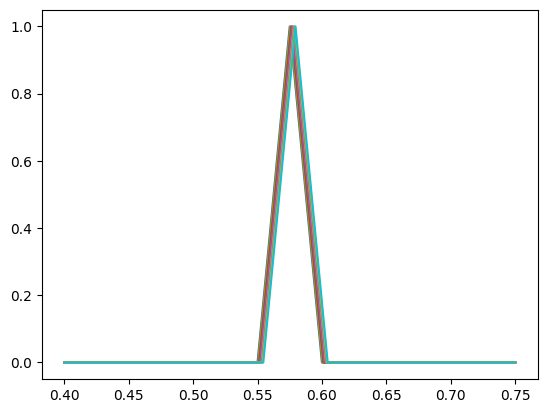

170


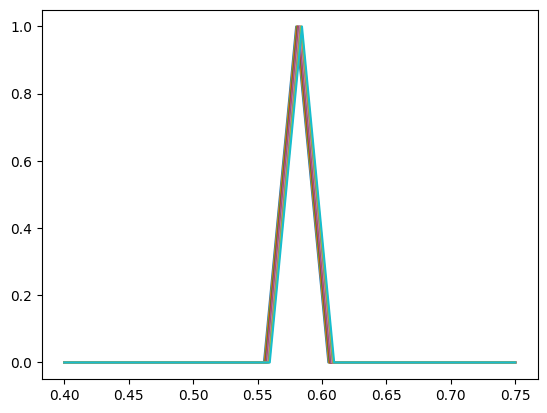

180


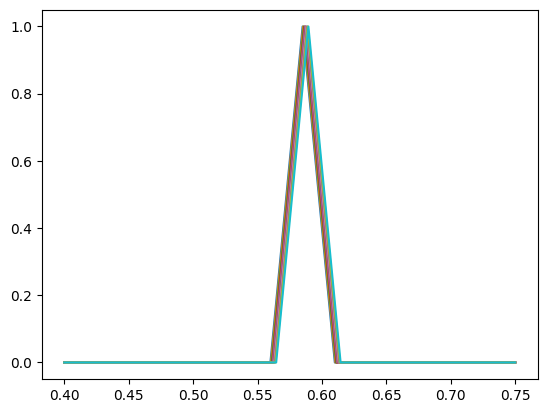

190


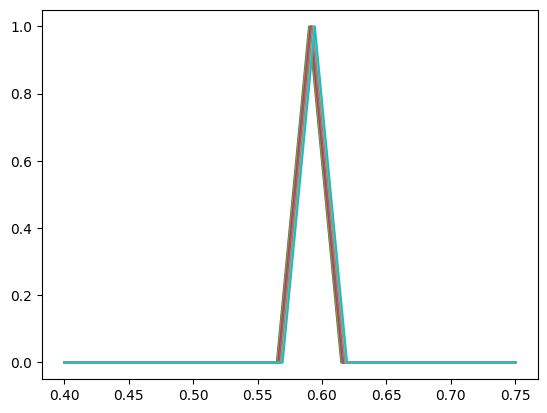

200


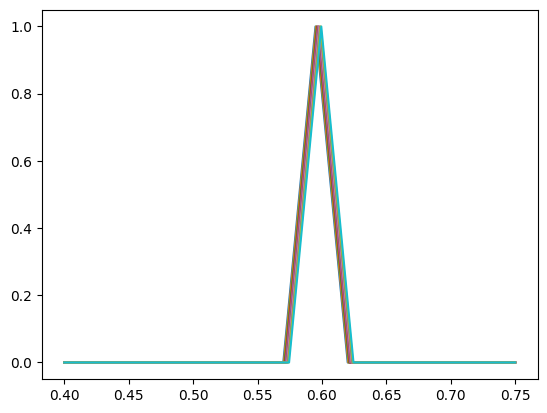

210


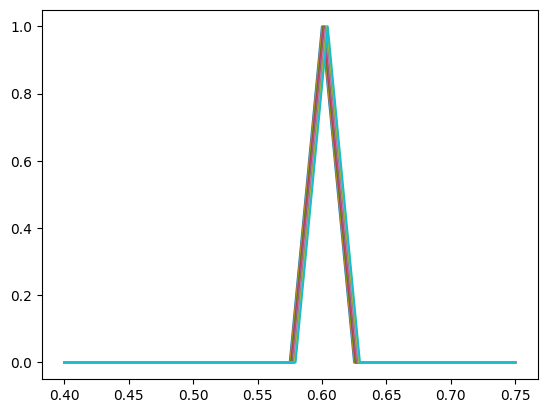

220


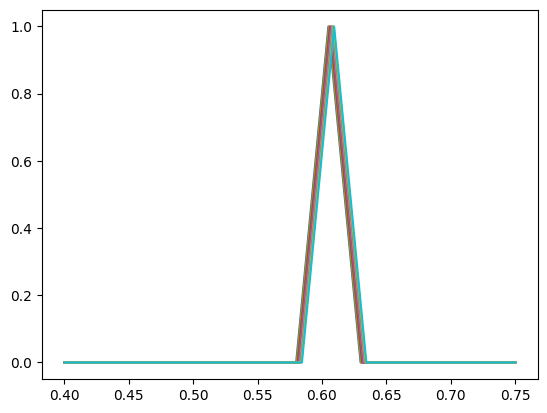

230


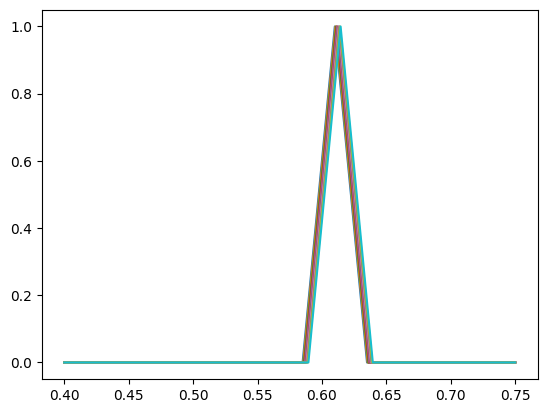

240


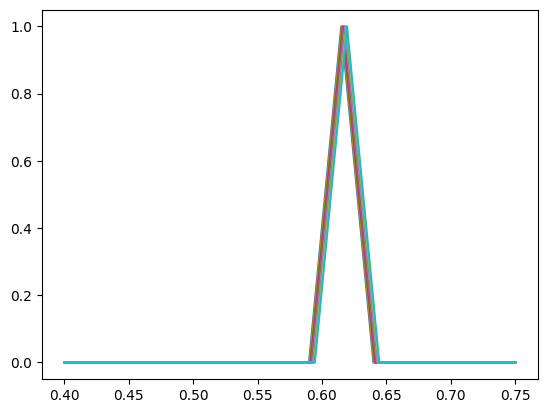

250


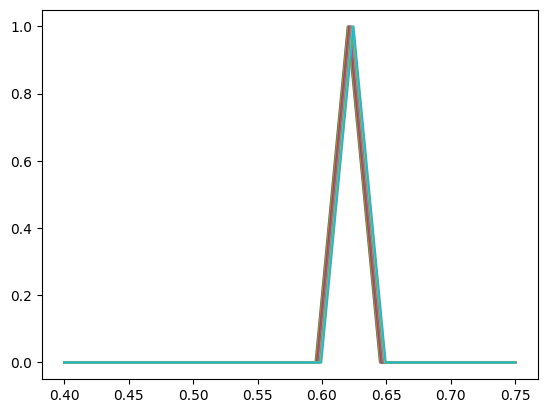

260


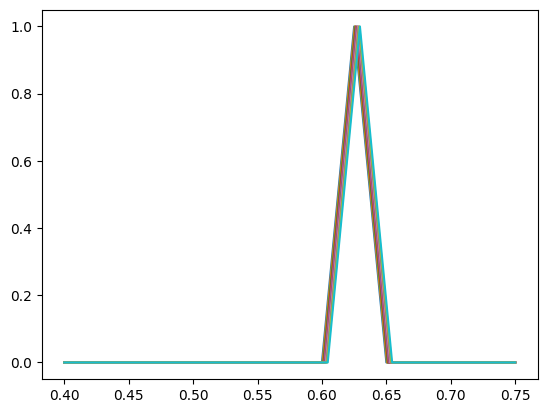

270


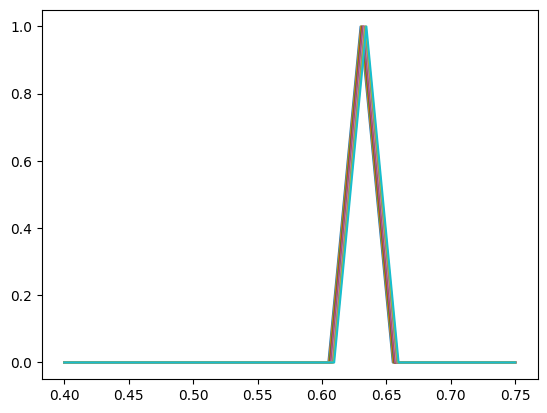

280


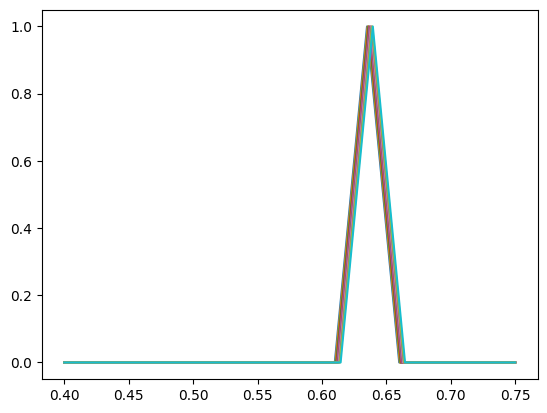

290


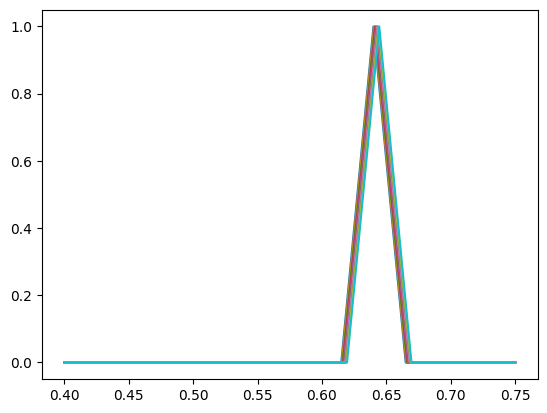

300


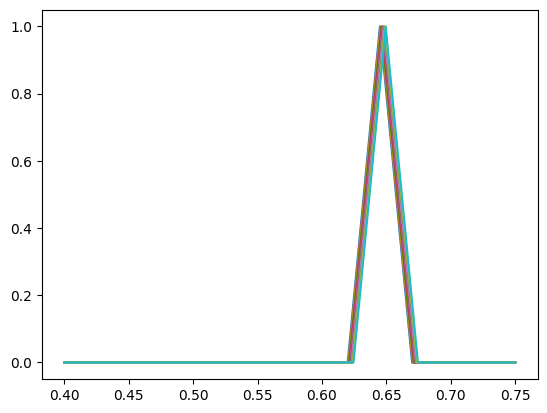

Exact solution vs Numerical Solution (dx = 0.0005)


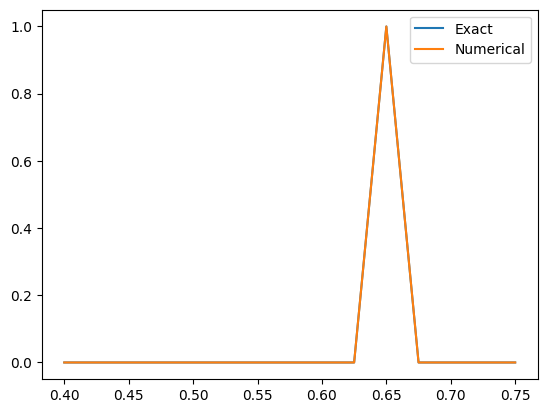

dx = 0.001


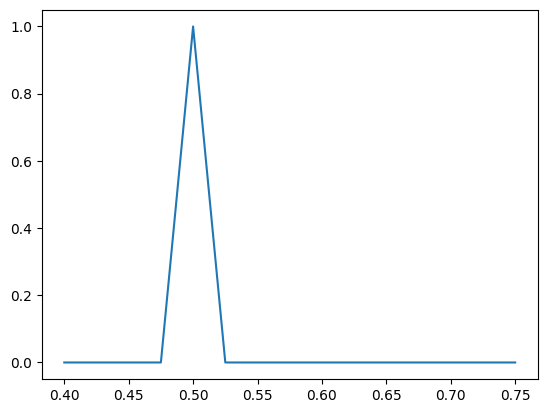

10


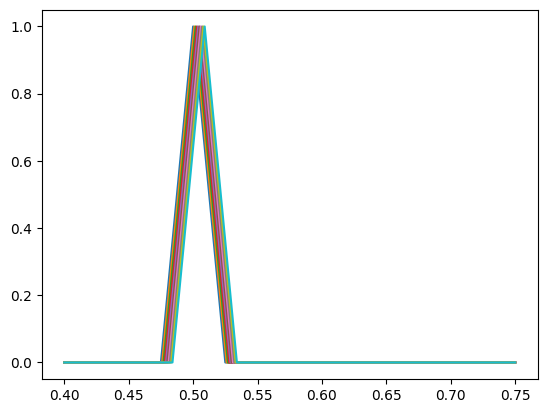

20


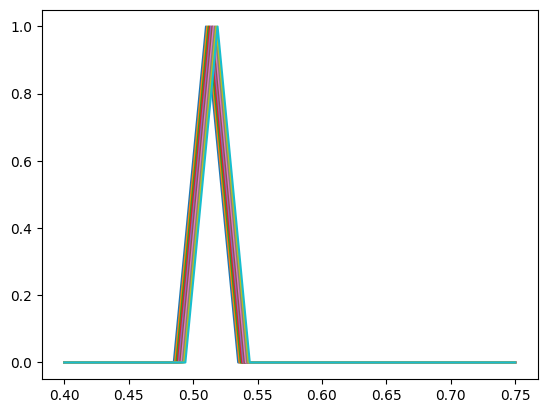

30


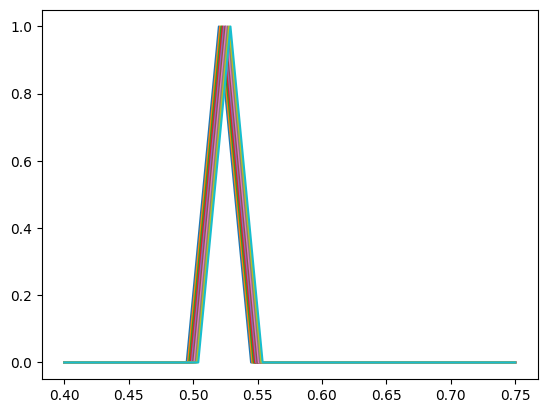

40


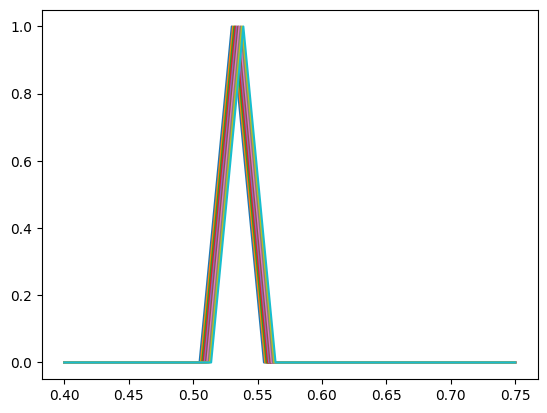

50


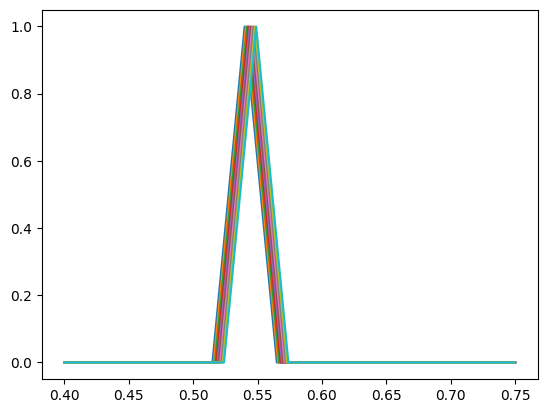

60


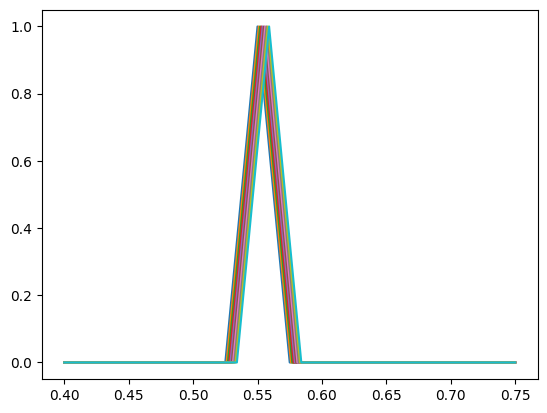

70


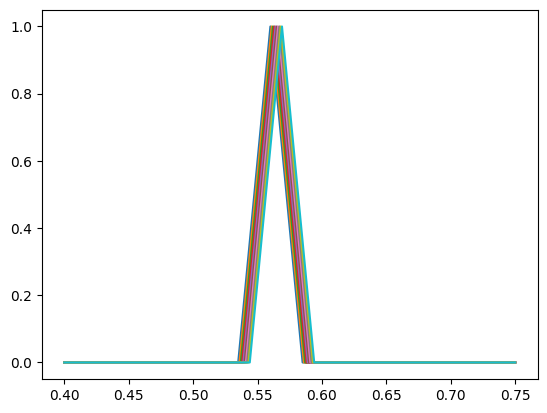

80


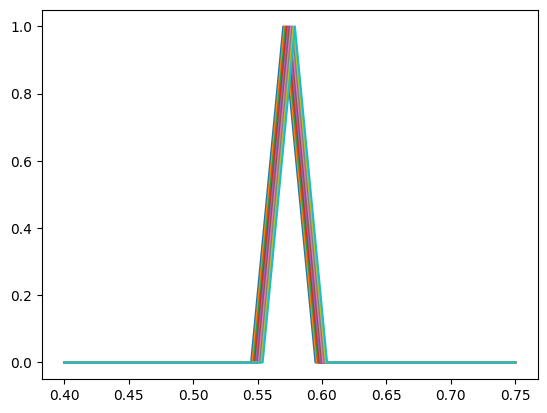

90


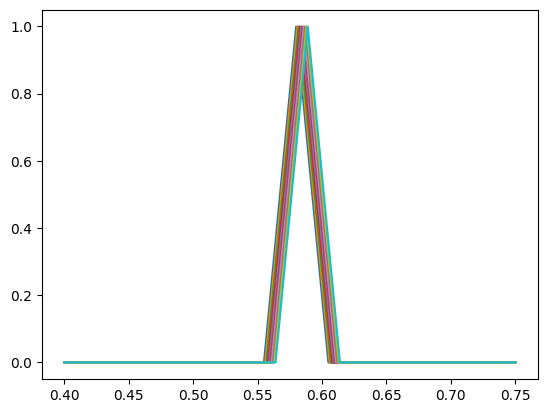

100


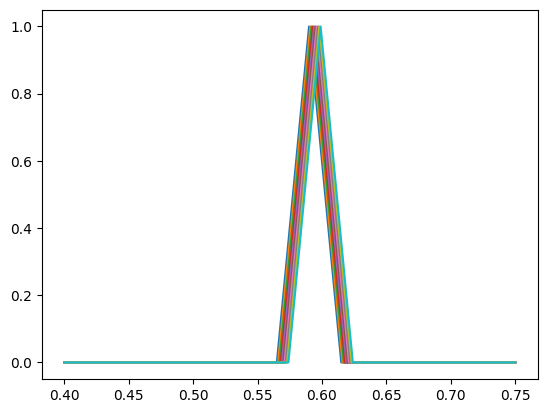

110


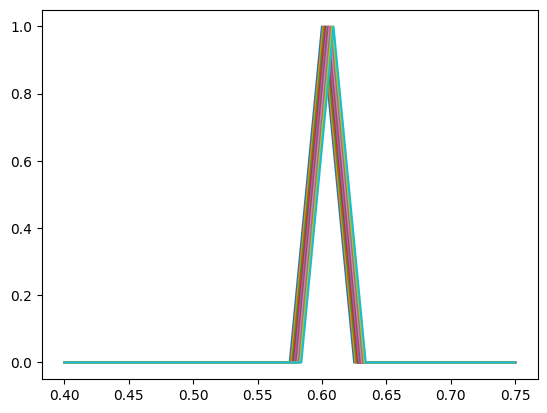

120


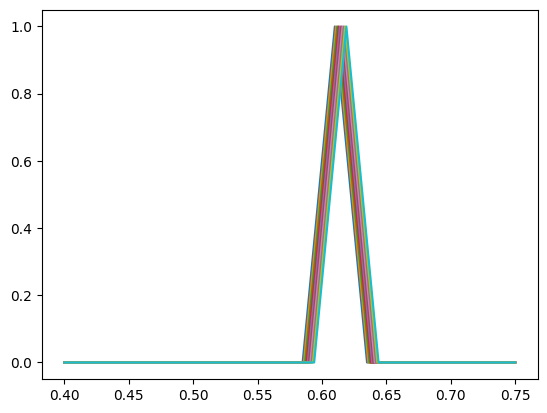

130


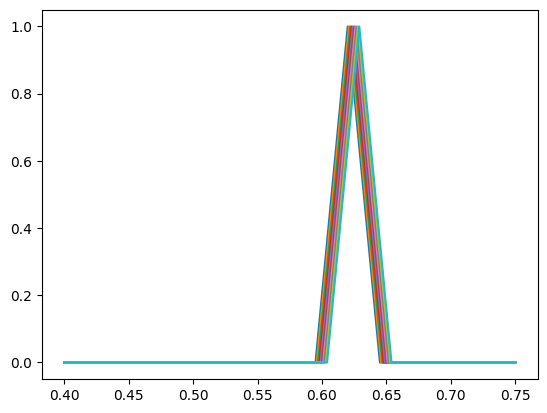

140


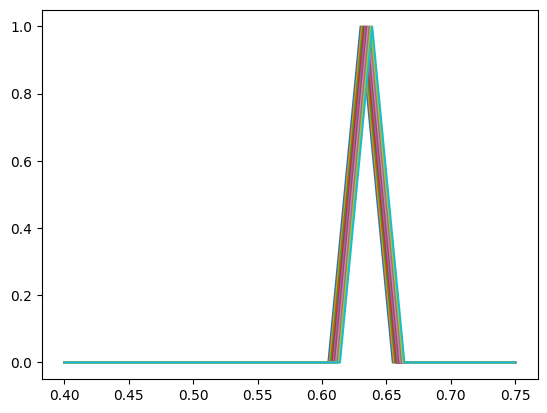

150


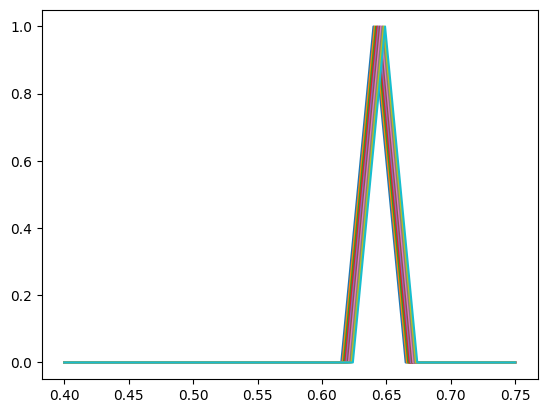

Exact solution vs Numerical Solution (dx = 0.001)


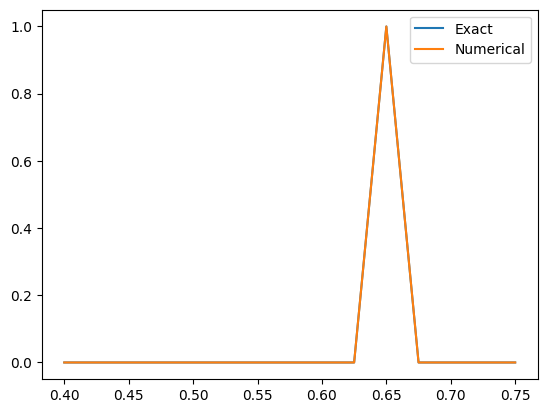

In [78]:
for k in range(len(dx_1)):
    print(f'dx = {dx_1[k]}')
    dt_1 = c_1*dx_1[k]/alpha_1
    x_1 = np.arange(0.4,0.75+dx_1[k],dx_1[k])

    u_1_exact = np.zeros(x_1.shape[0])
    for i in range(x_1.shape[0]):
        u_1_exact[i] = triangular_pulse_initial(x_1[i], x0_1+(alpha_1*0.15), h0_1, w0_1)
    
    u_1_a = np.zeros((x_1.shape[0], int((0.15-0)/dt_1)+1))
    for i in range(u_1_a.shape[0]):
        u_1_a[i][0] = triangular_pulse_initial(x_1[i], x0_1, h0_1, w0_1)
    
    plt.plot(x_1, u_1_a[:,0])
    plt.show()
    
    for j in range(u_1_a.shape[1]-1):
        for i in range(1, u_1_a.shape[0]):
            u_1_a[i][j+1] = (u_1_a[i][j]*(1-c_1)) + (u_1_a[i-1][j]*c_1)
        plt.plot(x_1, u_1_a[:, j])
        if (j+1)%10==0:
            print(j+1)
            plt.show()

    print(f"Exact solution vs Numerical Solution (dx = {dx_1[k]})")
    plt.plot(x_1, u_1_exact)
    plt.plot(x_1, u_1_a[:, u_1_a.shape[1]-1])
    plt.legend(["Exact", "Numerical"], bbox_to_anchor=(1,1))
    plt.show()

#### II) Crank Nicolson

##### Numerical damping is seen in Crank nicolson.
##### Also small oscillations are noticed in plots as time progresses.
##### This could be due to jump discontinuities in derivative of initial condition

##### Each plot contains graph of 10 time instants, scroll down to see plots at different time instants

##### See at end for Exact vs Numerical solution comparison graph

dx = 0.0005


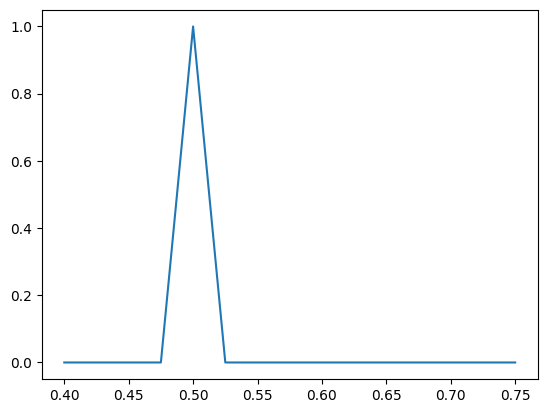

10


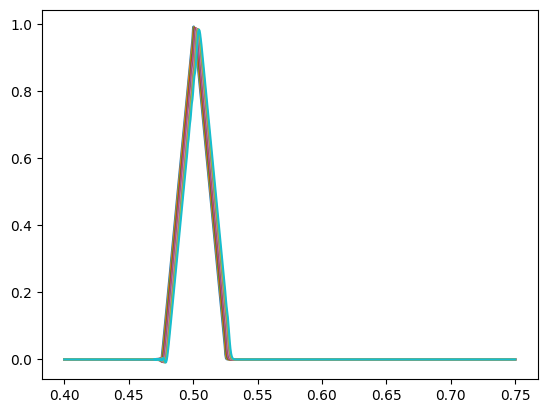

20


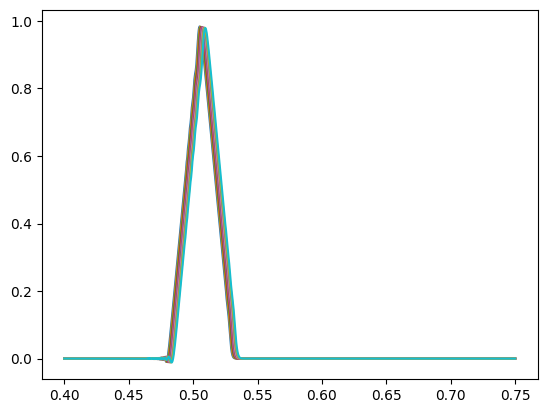

30


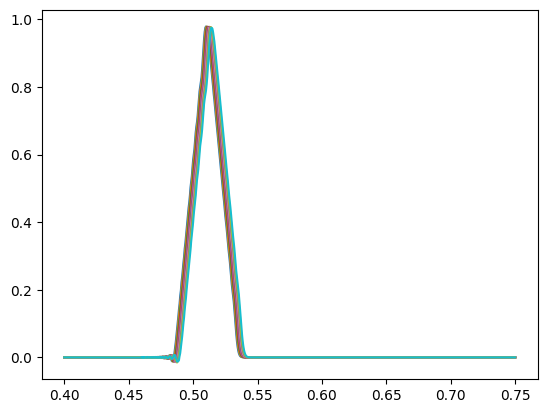

40


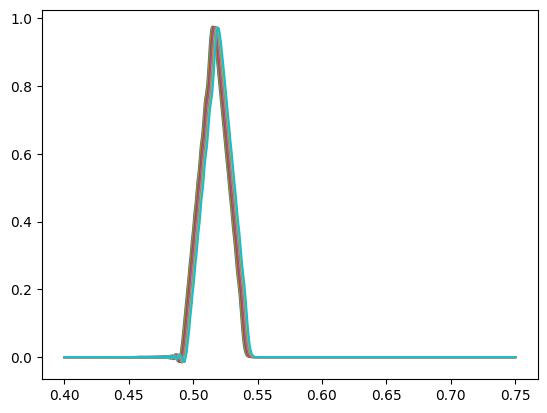

50


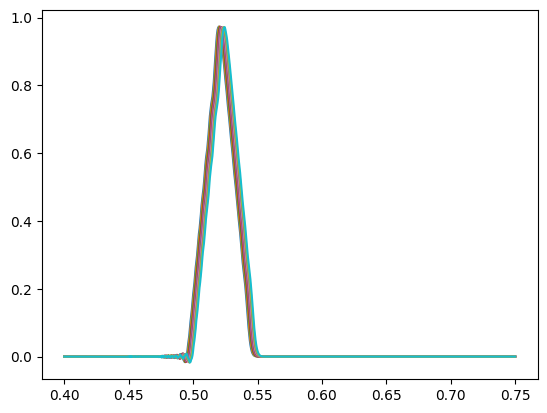

60


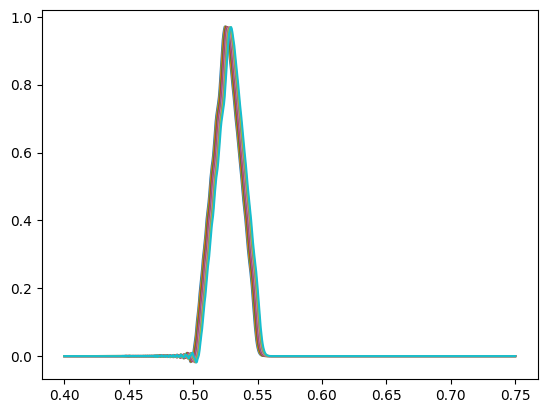

70


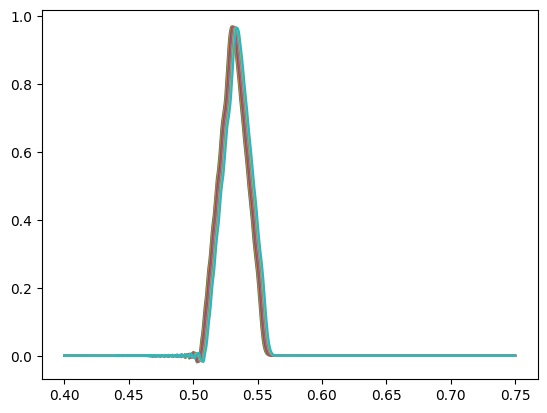

80


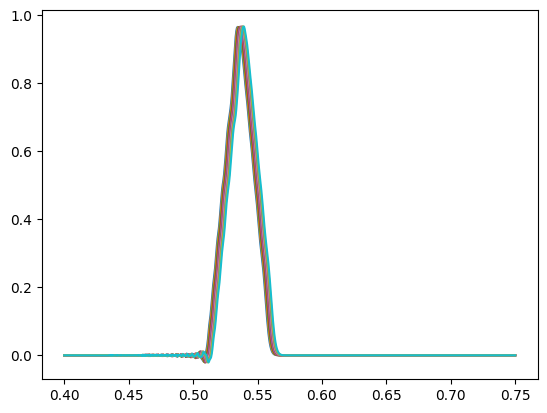

90


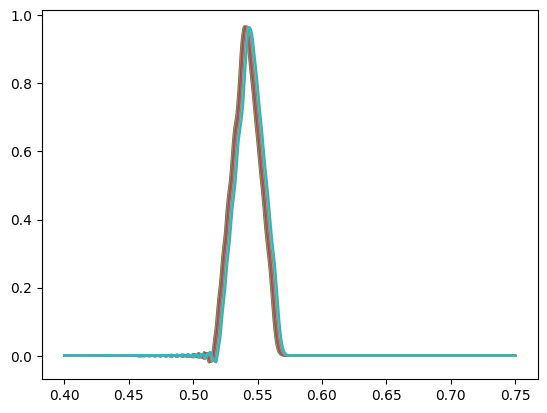

100


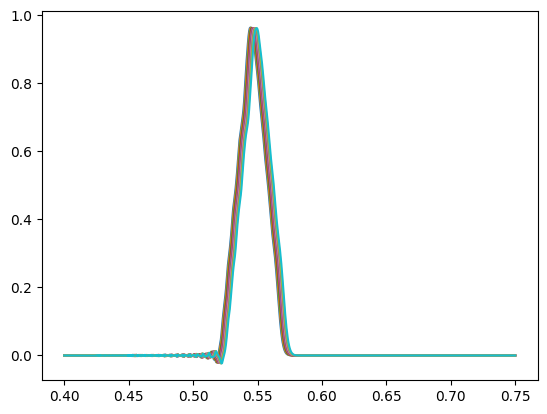

110


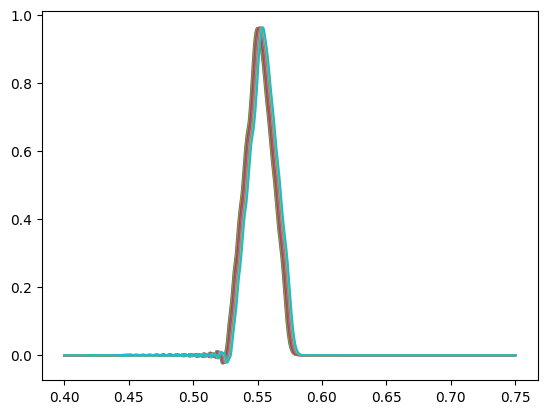

120


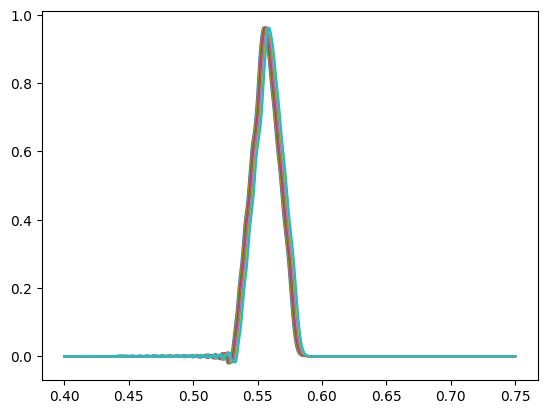

130


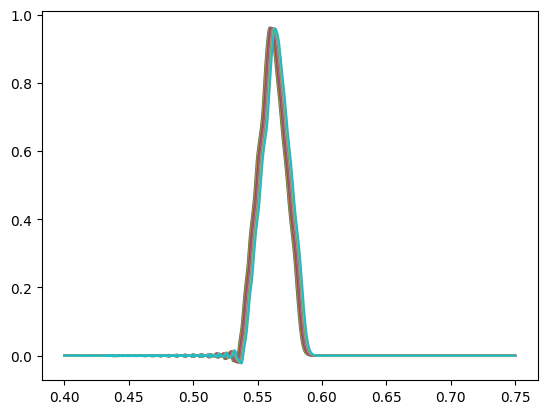

140


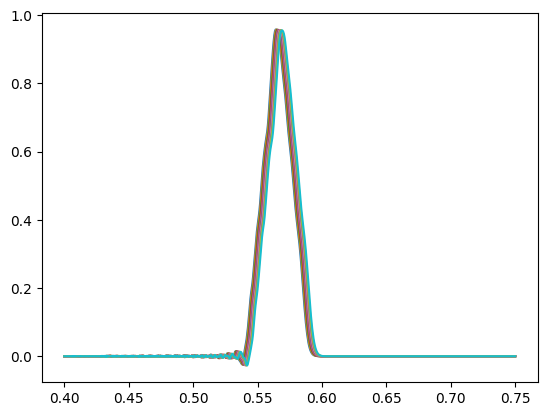

150


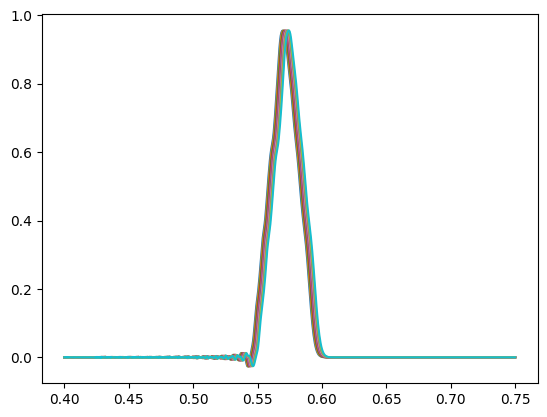

160


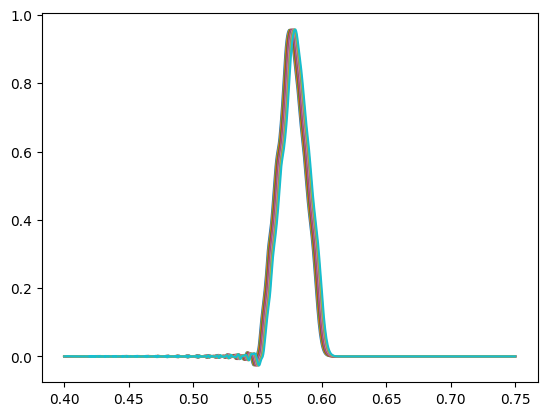

170


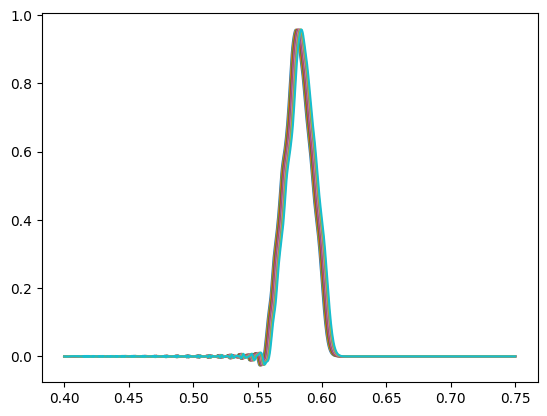

180


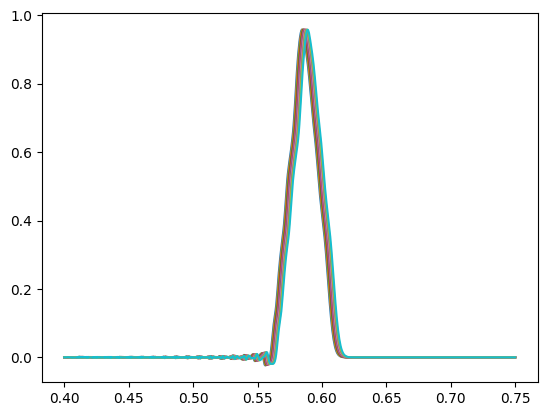

190


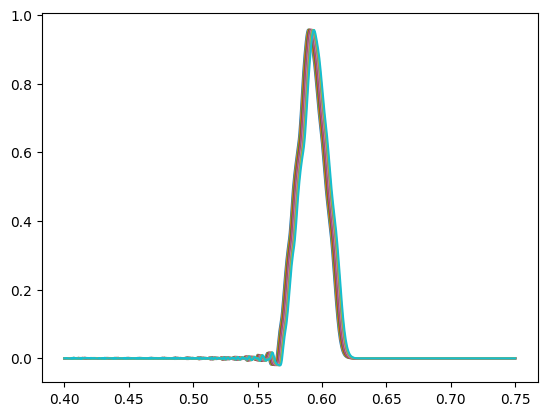

200


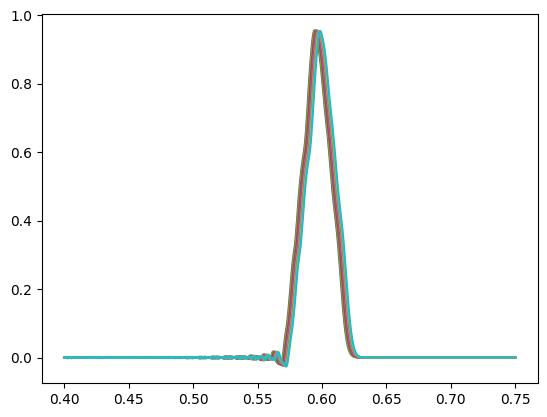

210


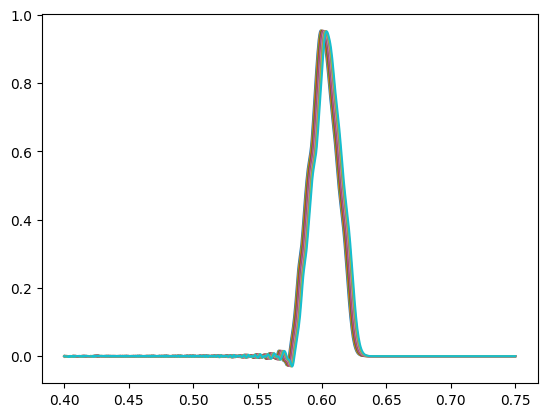

220


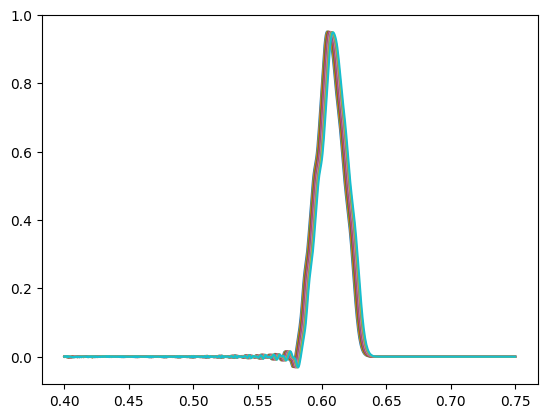

230


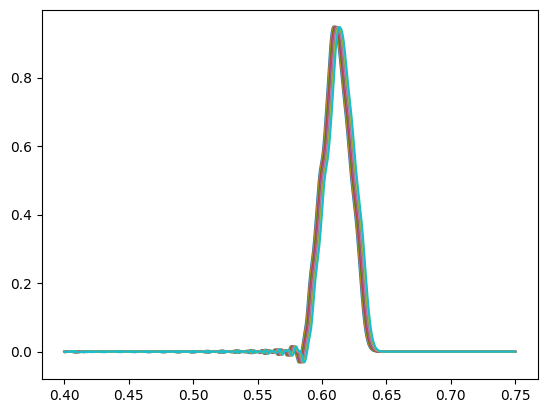

240


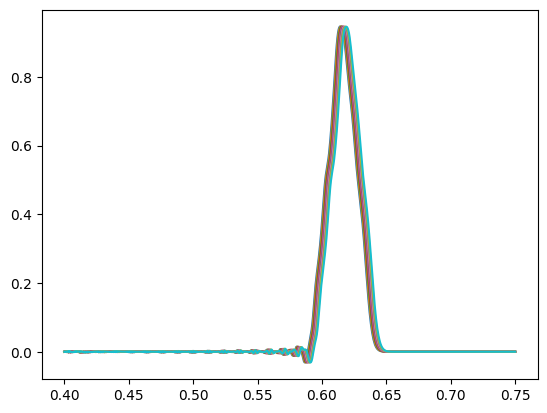

250


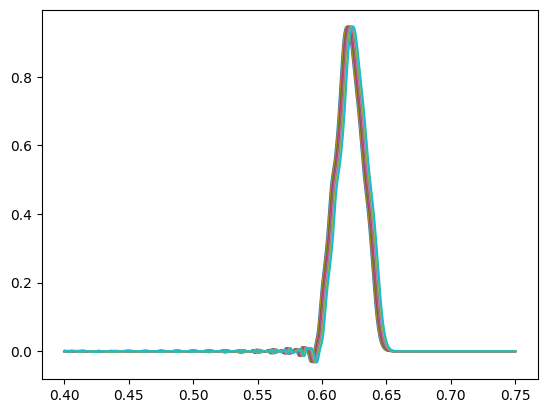

260


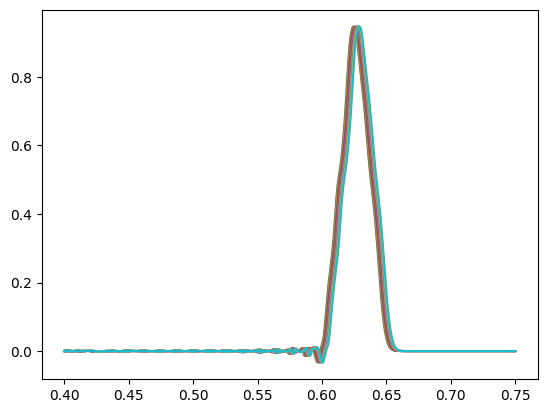

270


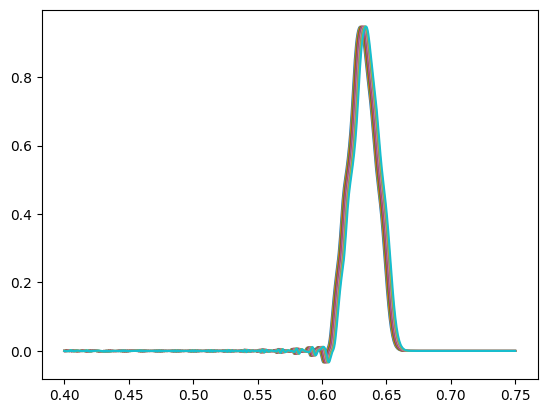

280


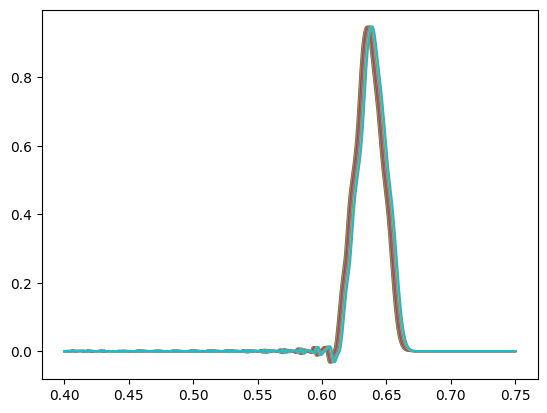

290


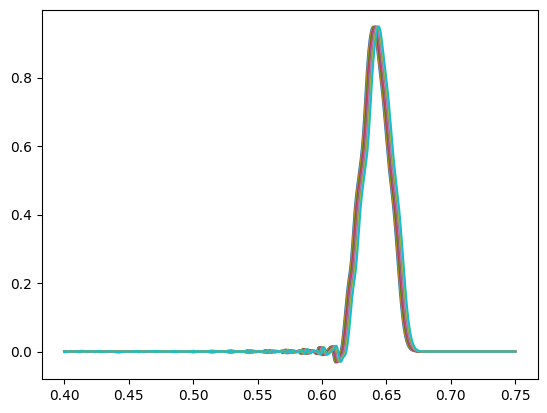

300


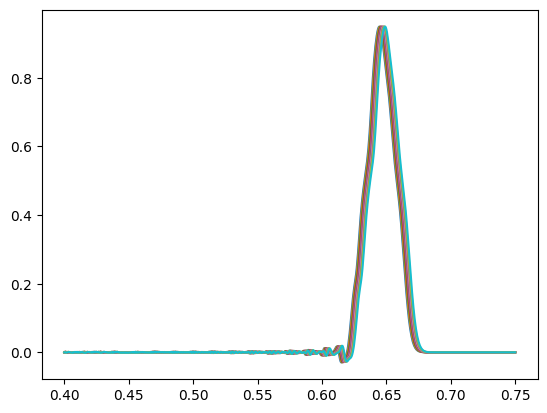

Exact solution vs Numerical Solution (dx = 0.0005)


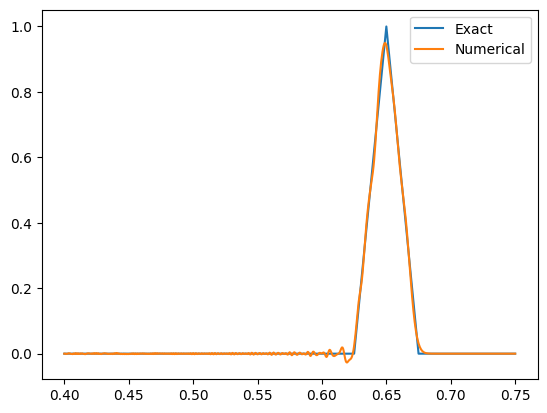

dx = 0.001


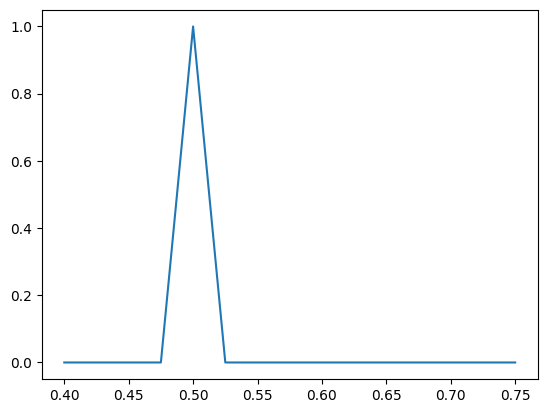

10


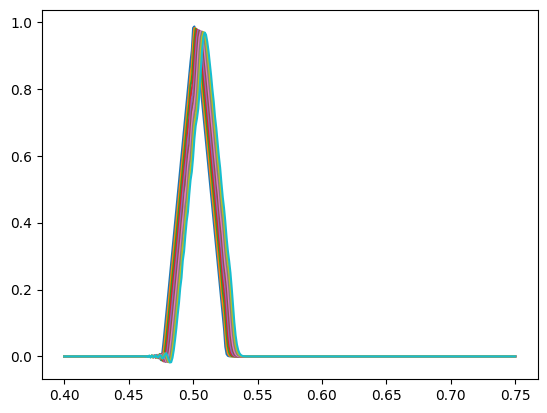

20


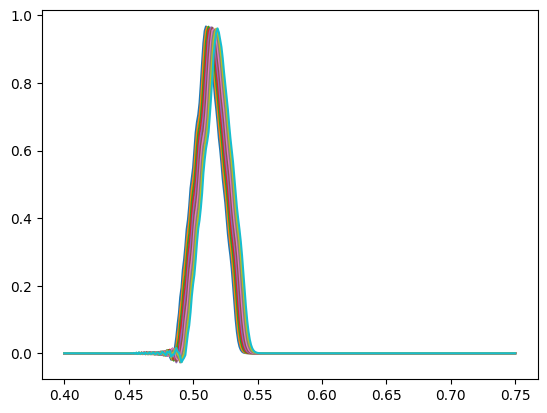

30


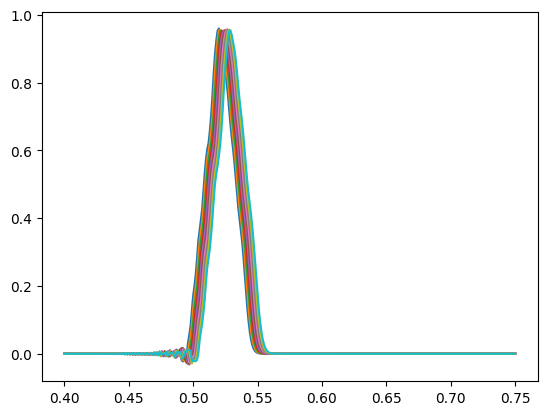

40


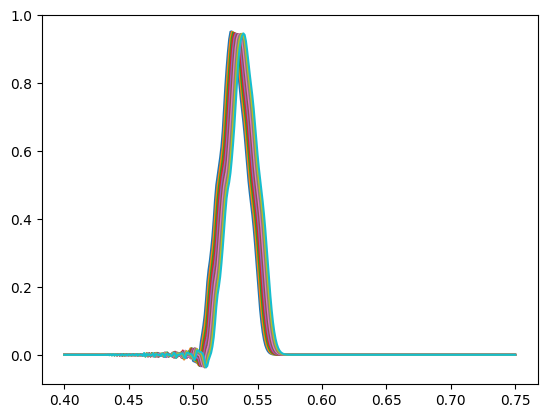

50


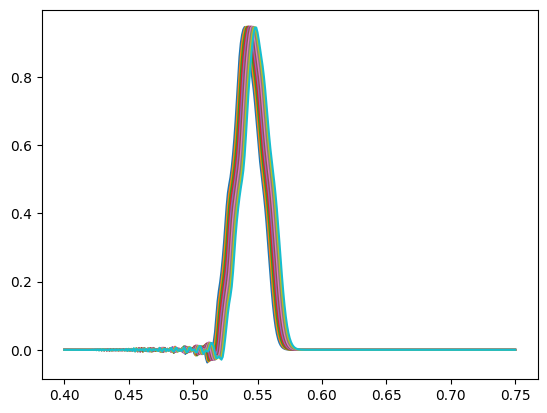

60


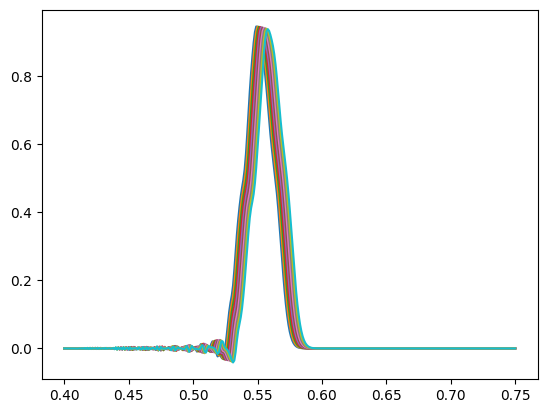

70


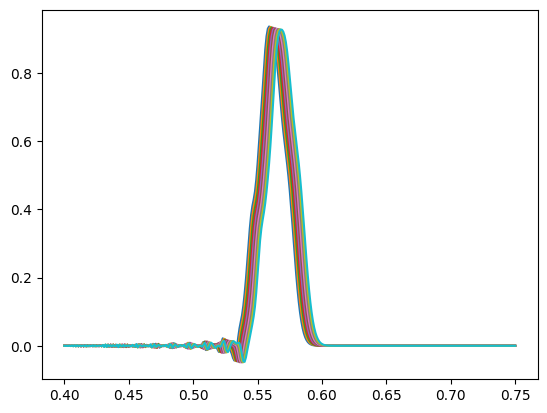

80


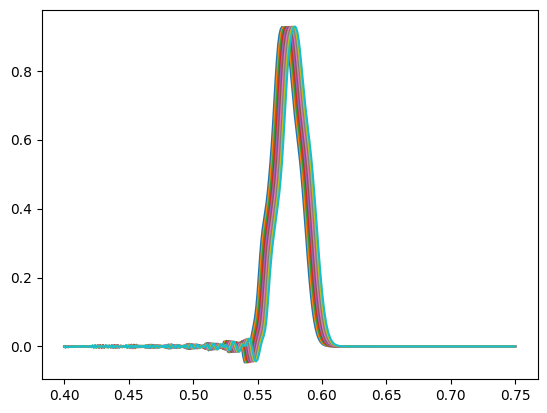

90


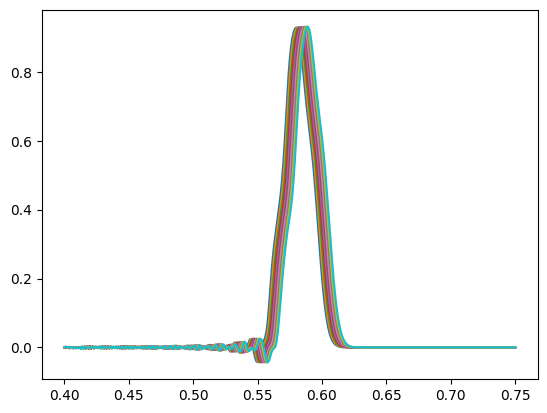

100


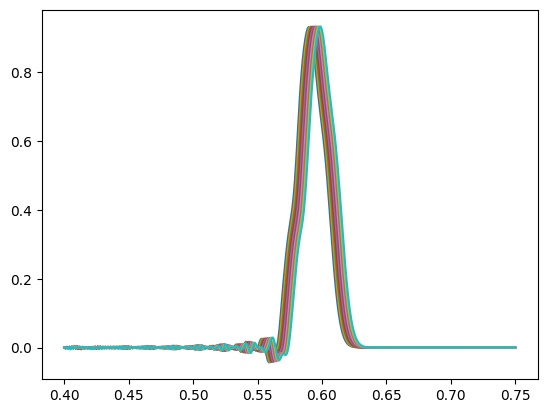

110


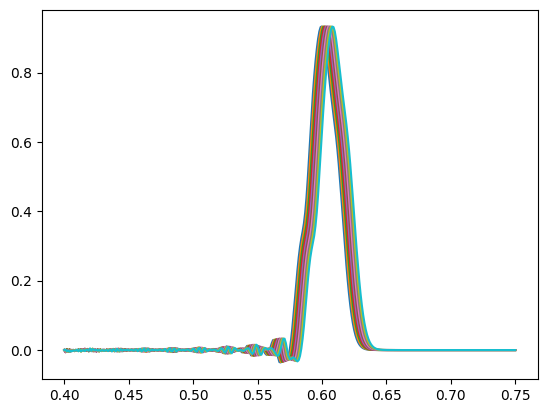

120


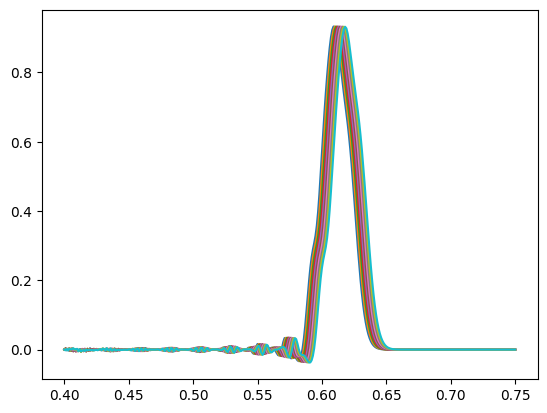

130


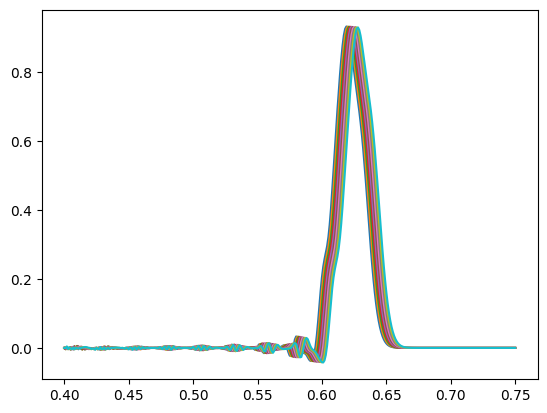

140


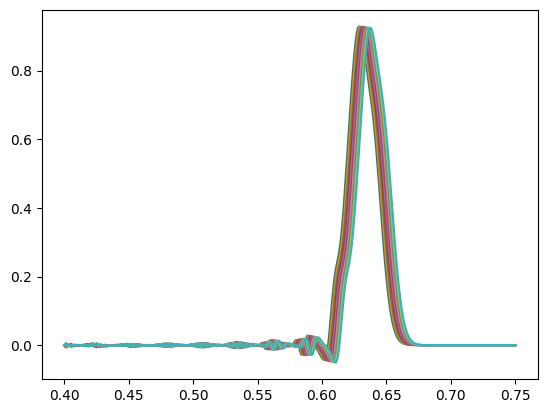

150


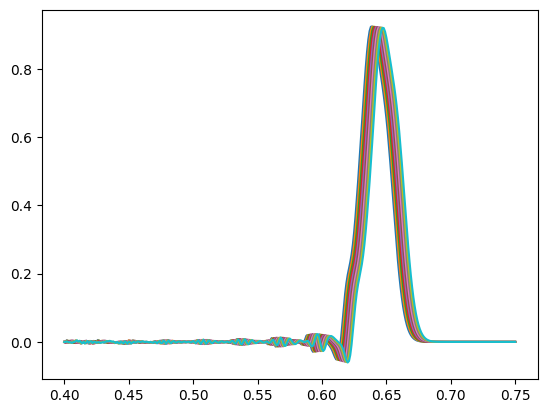

Exact solution vs Numerical Solution (dx = 0.001)


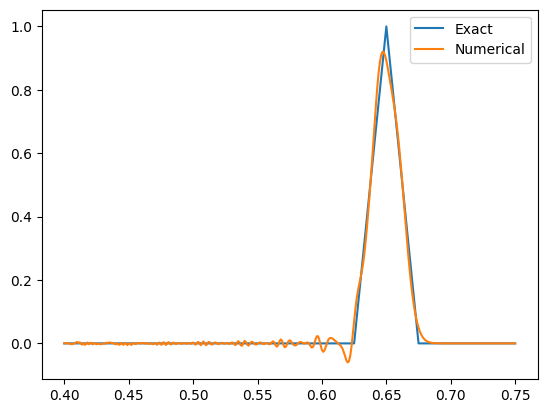

In [85]:
for k in range(len(dx_1)):
    print(f'dx = {dx_1[k]}')
    dt_1 = c_1*dx_1[k]/alpha_1
    x_1 = np.arange(0.4,0.75+dx_1[k],dx_1[k])

    u_1_exact = np.zeros(x_1.shape[0])
    for i in range(x_1.shape[0]):
        u_1_exact[i] = triangular_pulse_initial(x_1[i], x0_1+(alpha_1*0.15), h0_1, w0_1)

    
    u_1_b = np.zeros((x_1.shape[0], int((.15-0)/dt_1)+1))
    for i in range(u_1_b.shape[0]):
        u_1_b[i][0] = triangular_pulse_initial(x_1[i], x0_1, h0_1, w0_1)
        # print(u_1_a[i][0])
    
    plt.plot(x_1, u_1_b[:,0])
    plt.show()
    
    for j in range(u_1_b.shape[1]-1):
        
        dummy_b = np.zeros((x_1.shape[0],1))
        dummy_b[0][0] = 0
        dummy_b[x_1.shape[0]-1][0] = 0
        
        dummy_a = np.zeros((x_1.shape[0],x_1.shape[0]))
        dummy_a[0][0] = 1
        dummy_a[x_1.shape[0]-1][x_1.shape[0]-1] = 1
         
        for i in range(1, u_1_b.shape[0]-1):
            dummy_b[i] = (-c_1/4)*u_1_b[i+1][j] + (1)*u_1_b[i][j] + (c_1/4)*u_1_b[i-1][j]
    
            dummy_a[i][i-1] = -c_1/4
            dummy_a[i][i]   = 1
            dummy_a[i][i+1] = c_1/4
                
        ans_dummy = np.linalg.solve(dummy_a, dummy_b)
        u_1_b[:,j+1]=ans_dummy[:,0]
                
        plt.plot(x_1, u_1_b[:, j+1])
        if (j+1)%10==0:
            print(j+1)
            plt.show()

    print(f"Exact solution vs Numerical Solution (dx = {dx_1[k]})")
    plt.plot(x_1, u_1_exact)
    plt.plot(x_1, u_1_b[:, u_1_b.shape[1]-1])
    plt.legend(["Exact", "Numerical"], bbox_to_anchor=(1,1))
    plt.show()

### Part B

##### Clearly for both dx = 0.0005, 0.001 we can Numerical solution to be overlapping exact solution for most region except oscillations near end of triangular pulse in Crank Nicolson Scheme
##### This is clearly due to dispersive error in Crank Nicolson Scheme
##### Also for Crank Nicolson Scheme, numerical damping is seen

## Question 2

### Last 2 digits of my roll number is 24 (even). Hence I am solving Case (B): Crank Nicolson as instructed

In [8]:
x0_2    = -0.2
h0_2    = 0.1
w0_2    = 0.02
alpha_2 = 1
c_2     = 0.5

dx_2 = 0.001
dt_2 = c_2*dx_2/alpha_2

##### As mentioned in previous question, Crank nicolson shows numerical damping and small oscillations
##### Velocity of wave is taken to 1 if centre of pulse is on or to the left of origin. Else velocity is 2

##### As centre of pulse crosses origin, we can see that width of pulse increases
##### More clearly before origin, graphs of different time instants in a plot are placed closer, but after origin we can see there is an increase in spacing of these graphs in a plot
##### Both these oscillations, increase in width and increase in spacing between graphs in a plot are accounted by dispersive errors

##### Each plot contains graph of 10 time instants, scroll down to see plots at different time instants

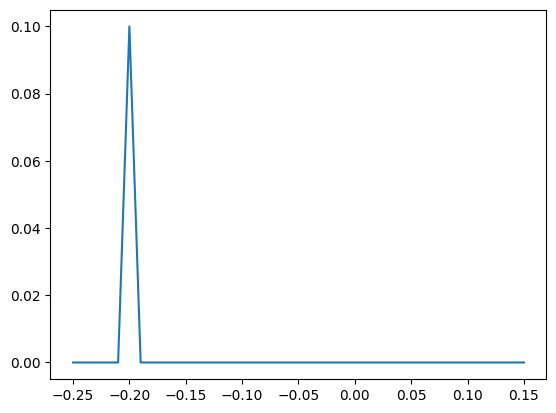

Centre of wave at -0.19599999999999995


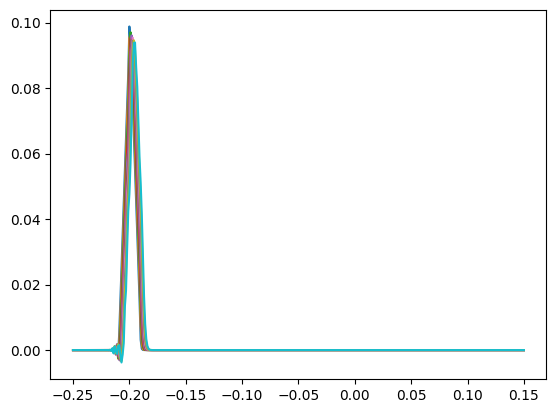

Centre of wave at -0.19099999999999995


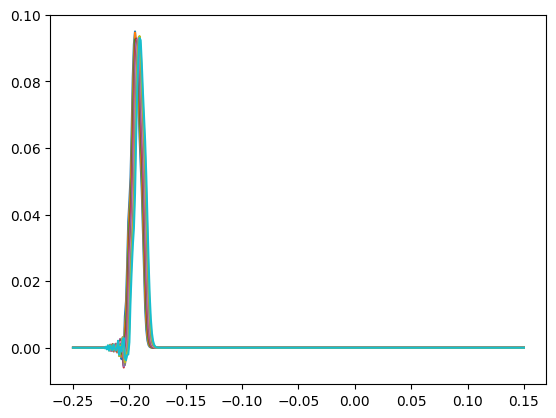

Centre of wave at -0.18699999999999994


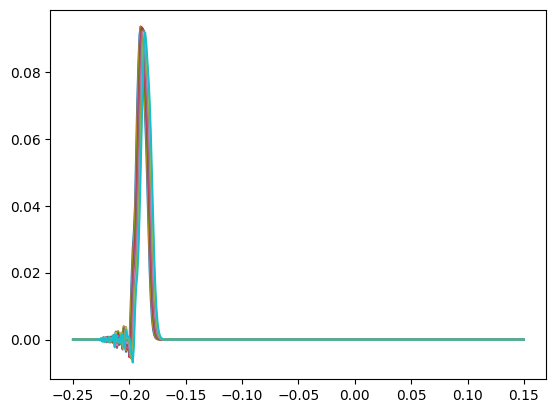

Centre of wave at -0.18199999999999994


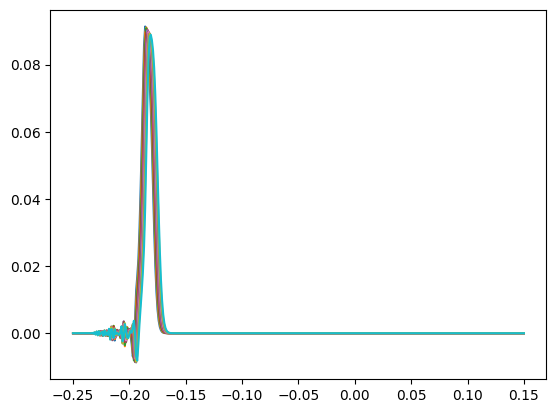

Centre of wave at -0.17599999999999993


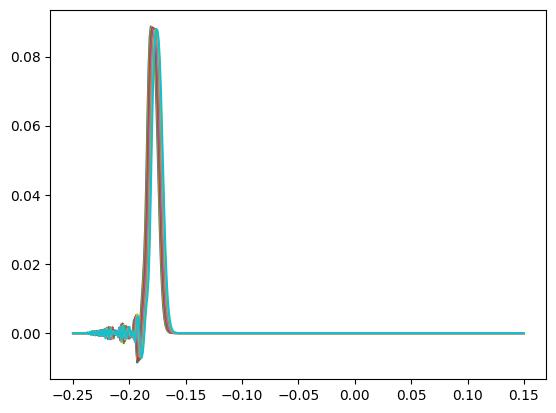

Centre of wave at -0.17099999999999993


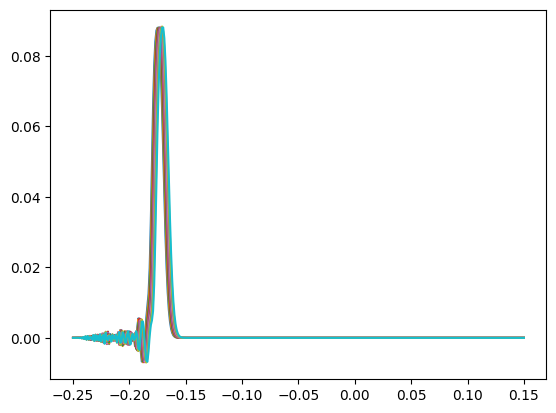

Centre of wave at -0.16599999999999993


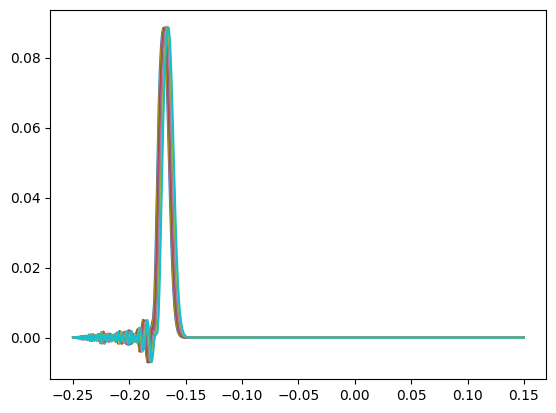

Centre of wave at -0.16099999999999992


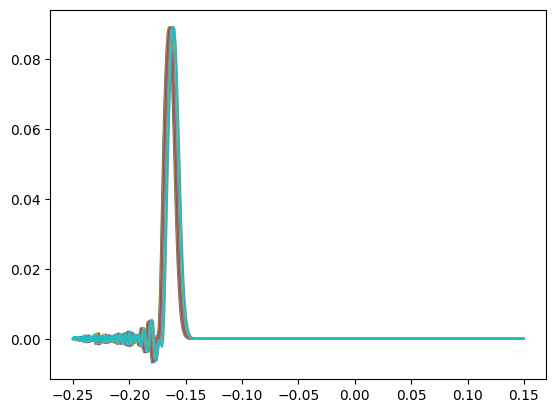

Centre of wave at -0.15599999999999992


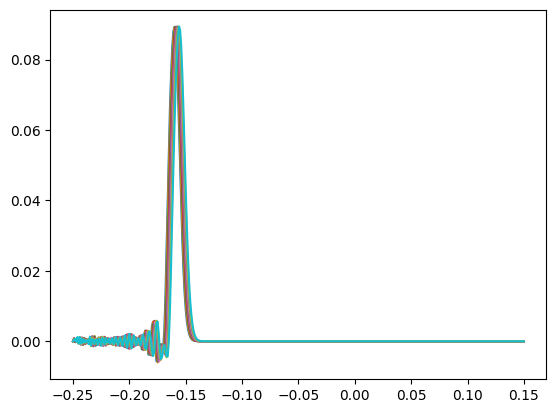

Centre of wave at -0.1509999999999999


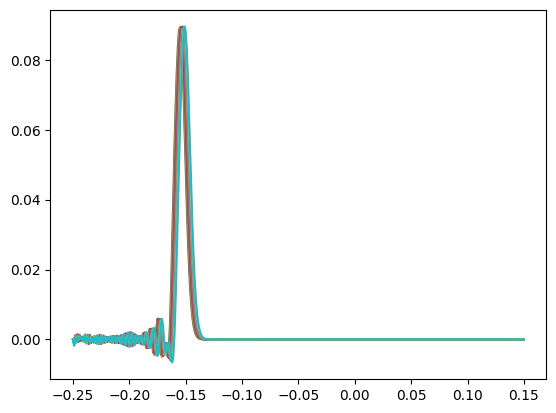

Centre of wave at -0.1459999999999999


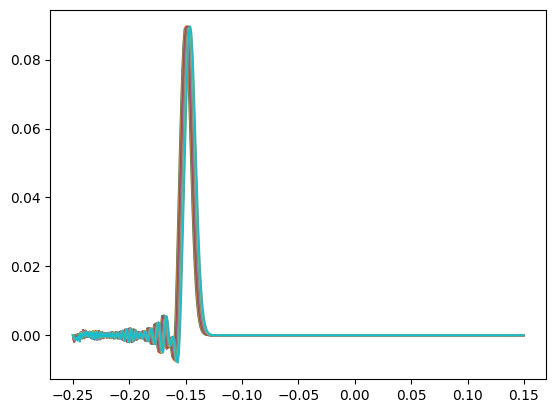

Centre of wave at -0.1419999999999999


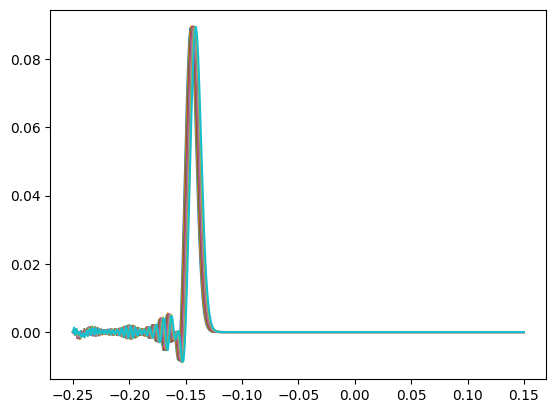

Centre of wave at -0.1369999999999999


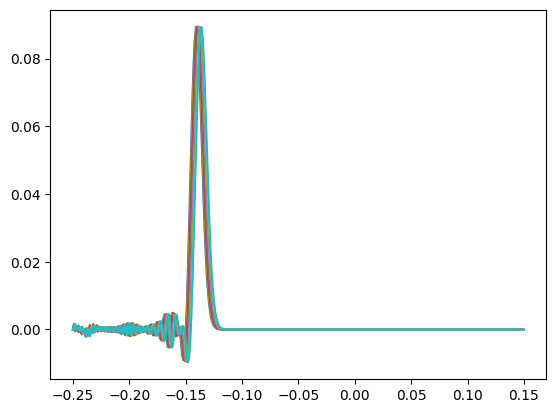

Centre of wave at -0.1319999999999999


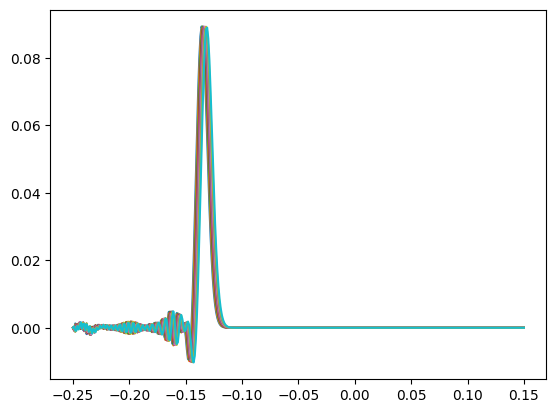

Centre of wave at -0.1269999999999999


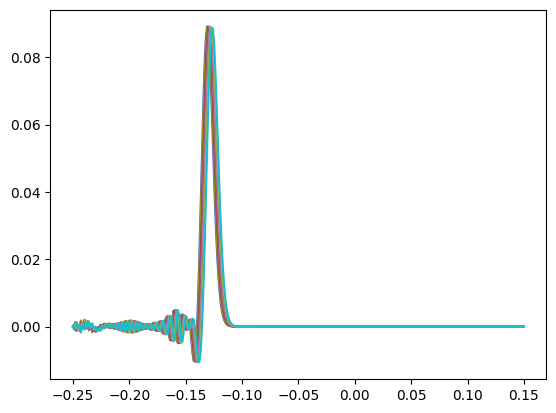

Centre of wave at -0.12199999999999989


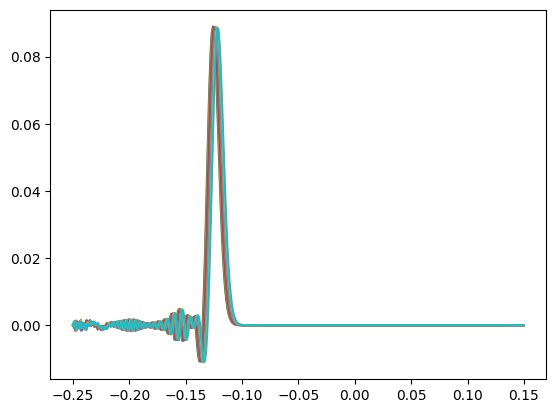

Centre of wave at -0.11699999999999988


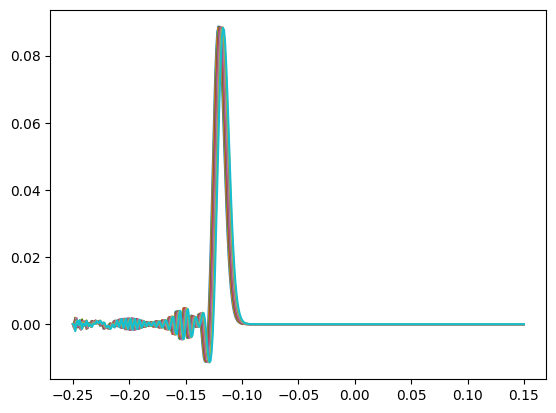

Centre of wave at -0.11199999999999988


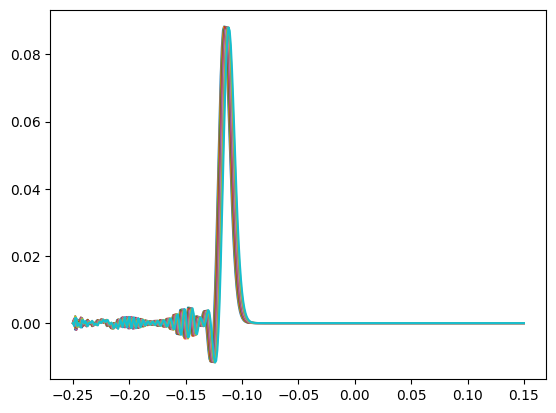

Centre of wave at -0.10699999999999987


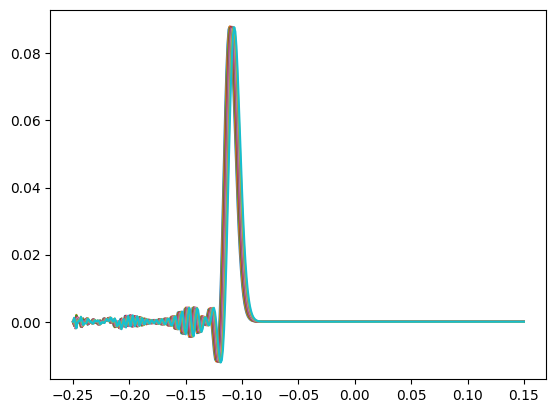

Centre of wave at -0.10199999999999987


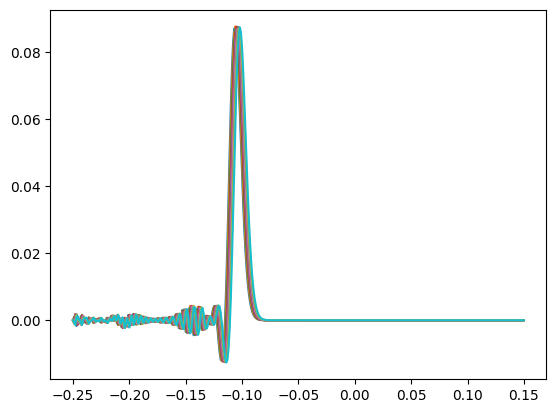

Centre of wave at -0.09799999999999986


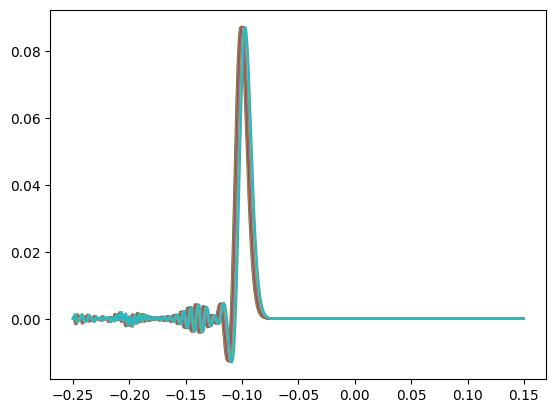

Centre of wave at -0.09299999999999986


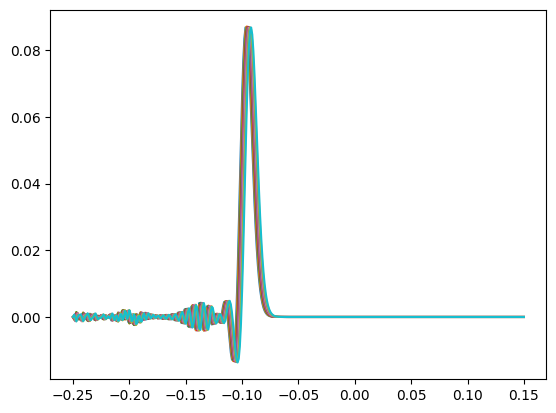

Centre of wave at -0.08799999999999986


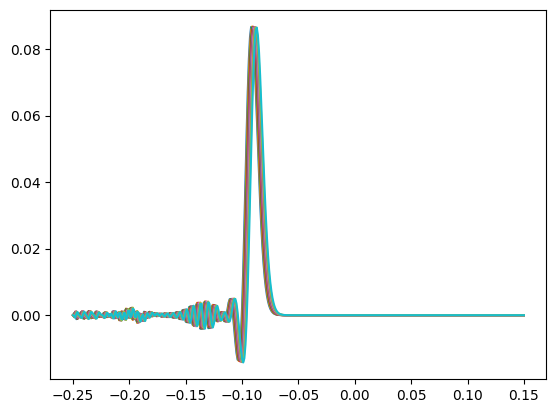

Centre of wave at -0.08299999999999985


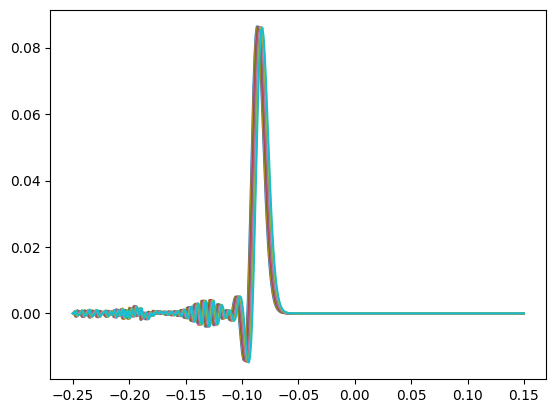

Centre of wave at -0.07799999999999985


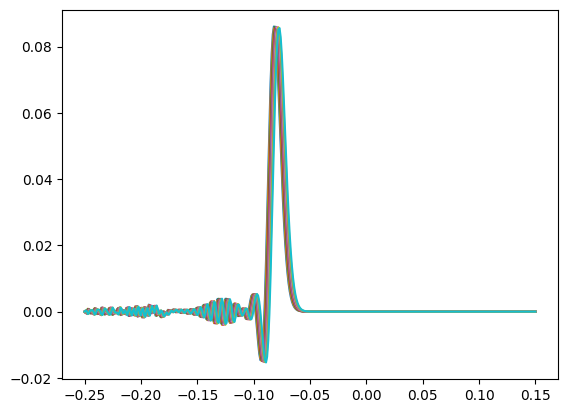

Centre of wave at -0.07299999999999984


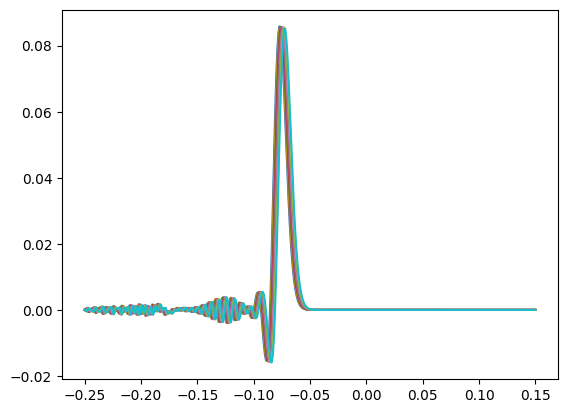

Centre of wave at -0.06799999999999984


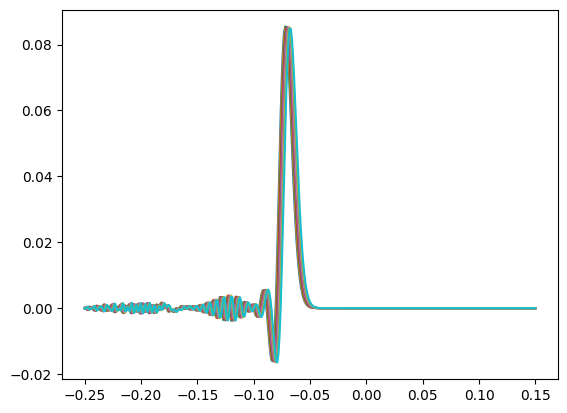

Centre of wave at -0.06299999999999983


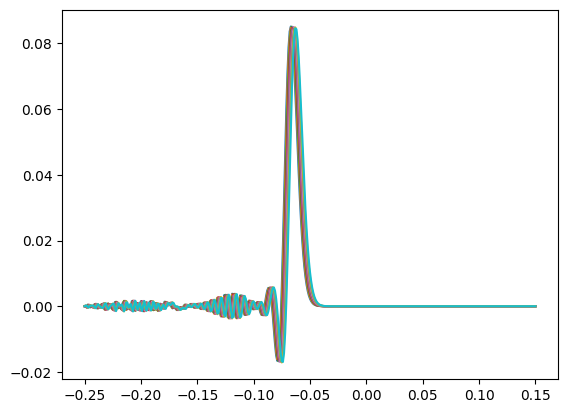

Centre of wave at -0.05799999999999983


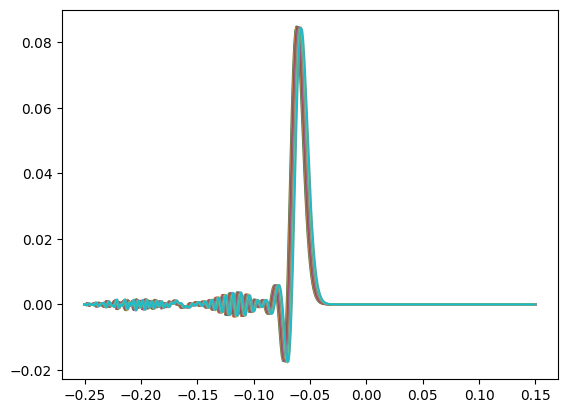

Centre of wave at -0.052999999999999825


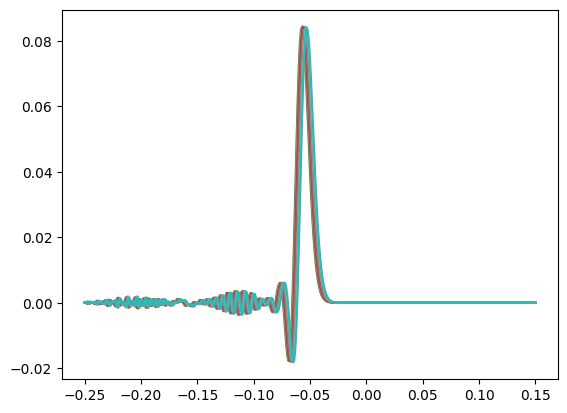

Centre of wave at -0.04799999999999982


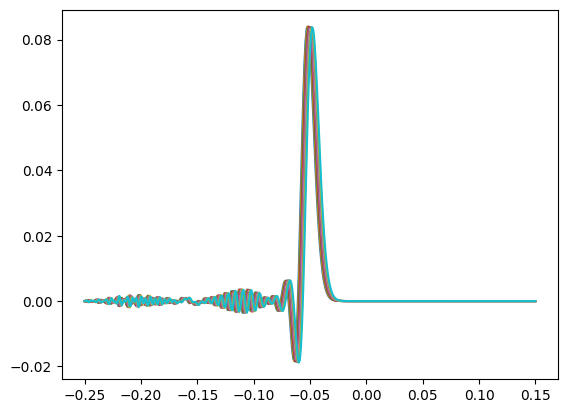

Centre of wave at -0.042999999999999816


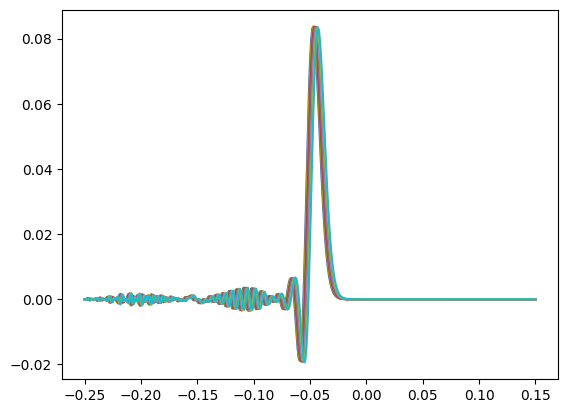

Centre of wave at -0.03799999999999981


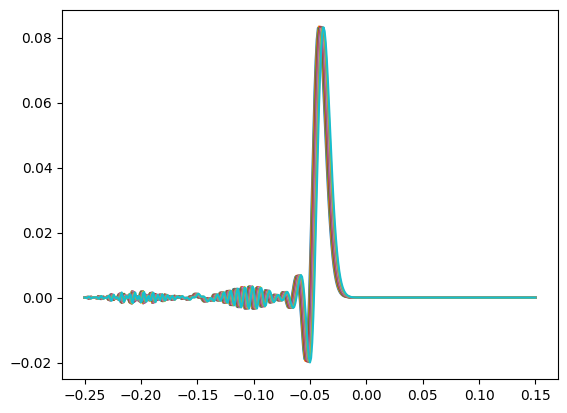

Centre of wave at -0.03299999999999981


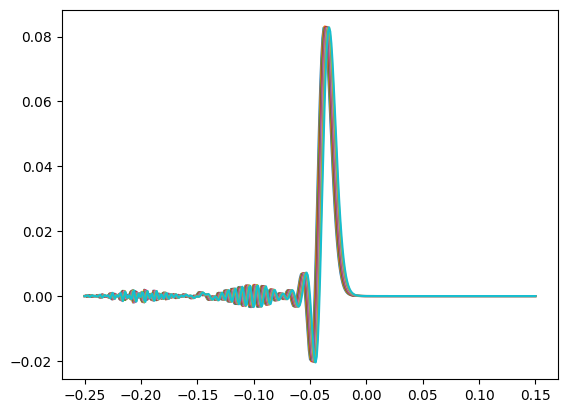

Centre of wave at -0.028999999999999804


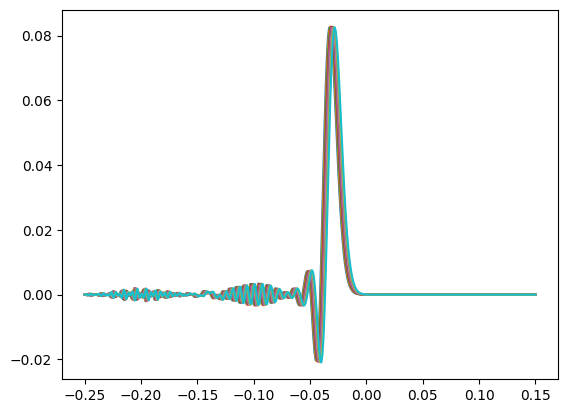

Centre of wave at -0.0239999999999998


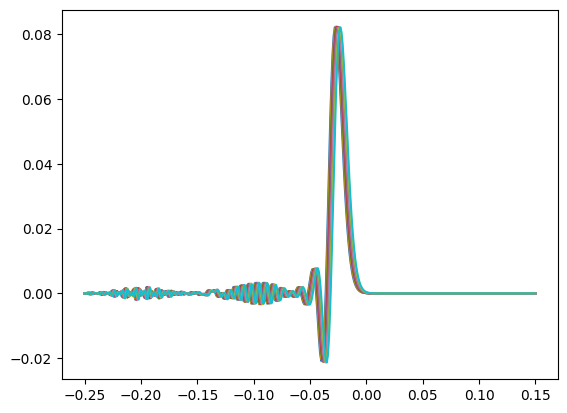

Centre of wave at -0.018999999999999795


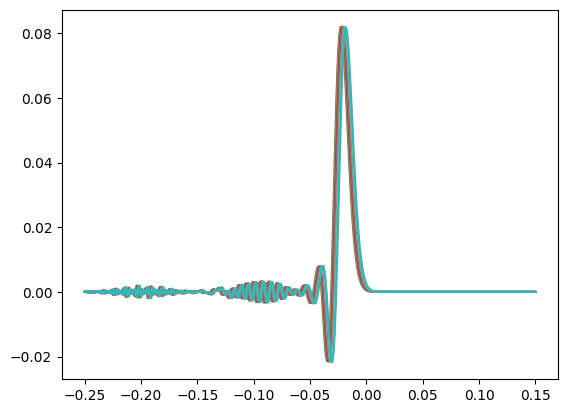

Centre of wave at -0.01399999999999979


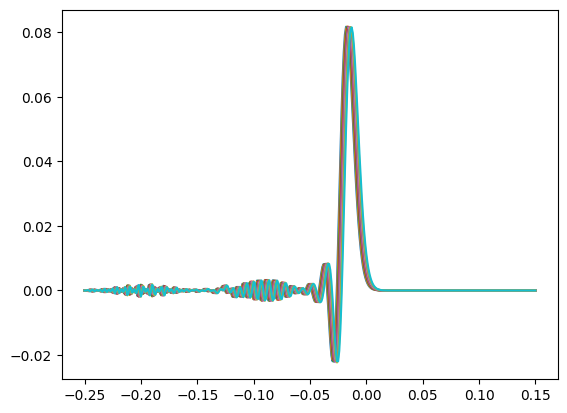

Centre of wave at -0.008999999999999786


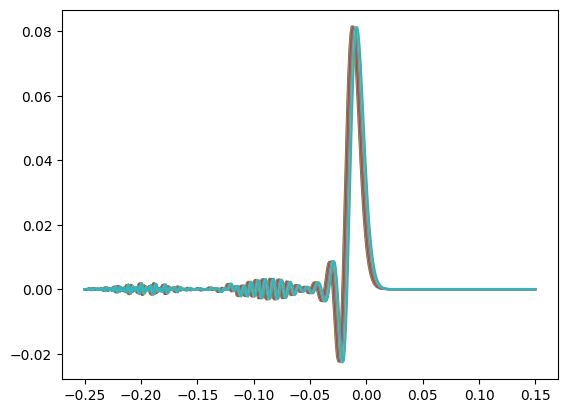

Centre of wave at -0.0039999999999997815


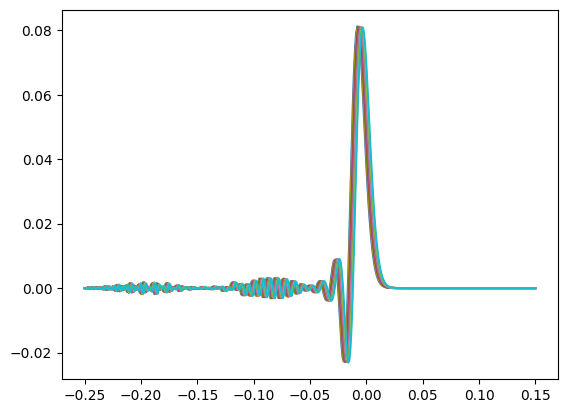

Centre of wave at 0.0030000000000002247


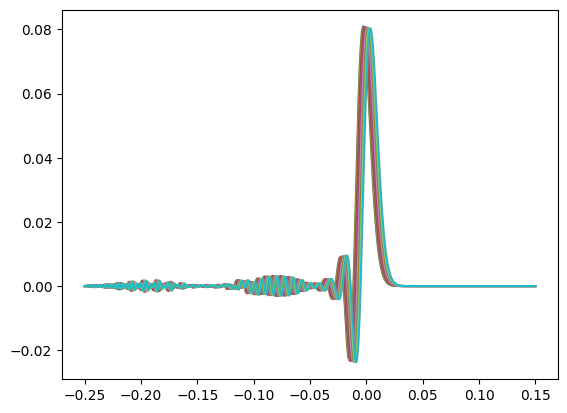

Centre of wave at 0.012000000000000233


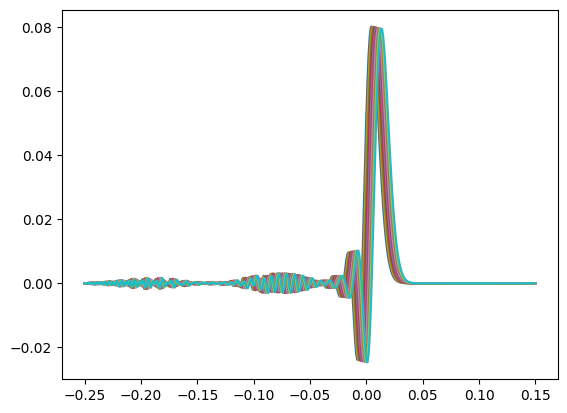

Centre of wave at 0.02200000000000024


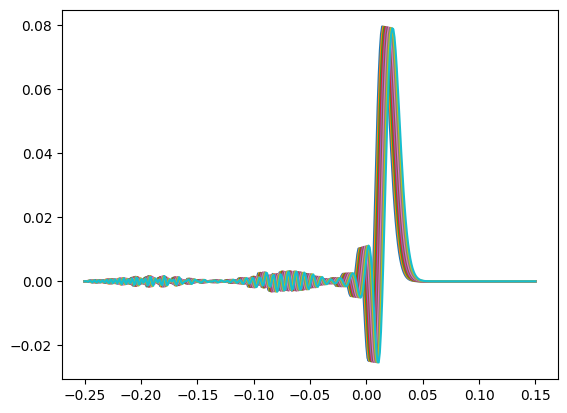

Centre of wave at 0.03200000000000025


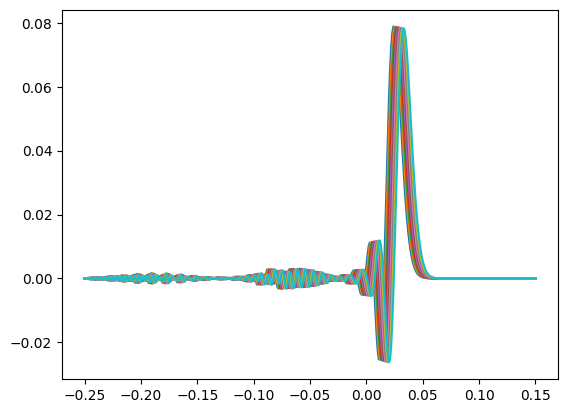

Centre of wave at 0.04200000000000026


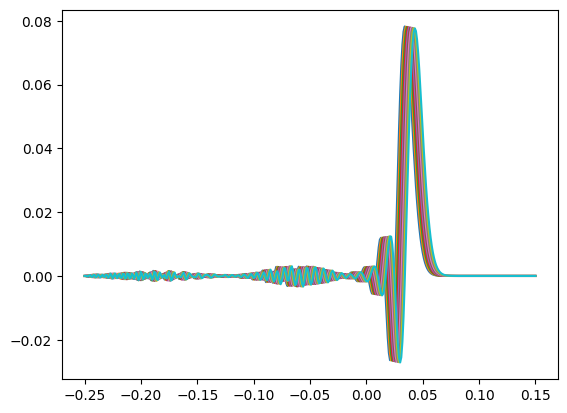

Centre of wave at 0.05200000000000027


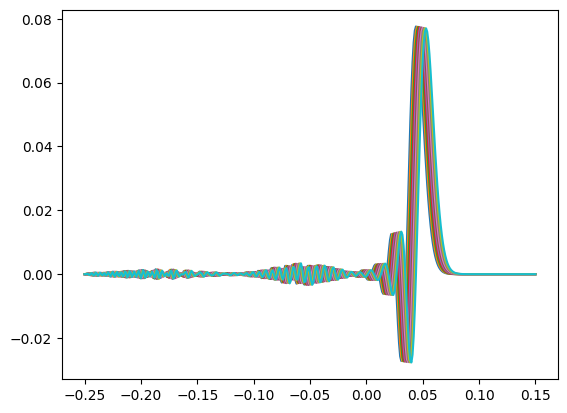

Centre of wave at 0.06200000000000028


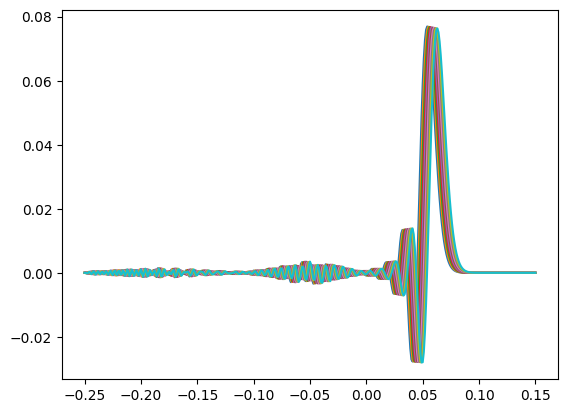

Centre of wave at 0.07200000000000029


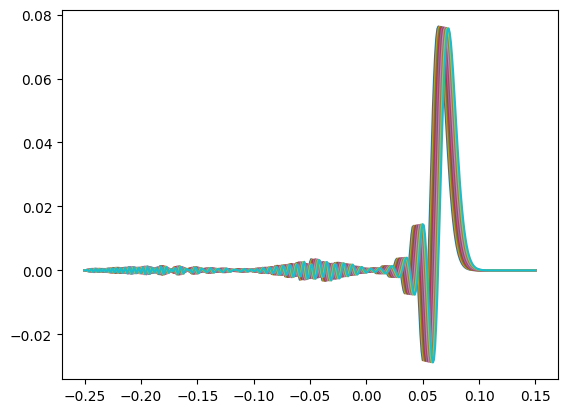

Centre of wave at 0.0820000000000003


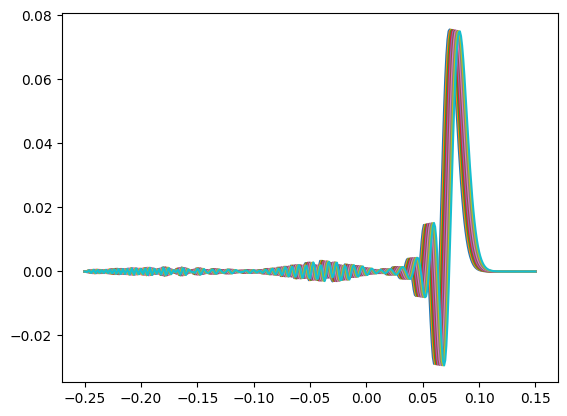

Centre of wave at 0.0920000000000003


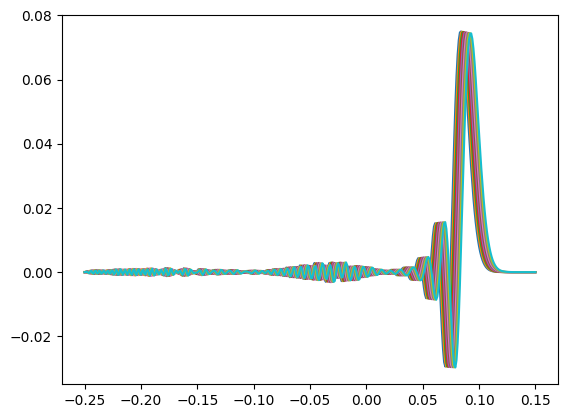

Centre of wave at 0.10100000000000031


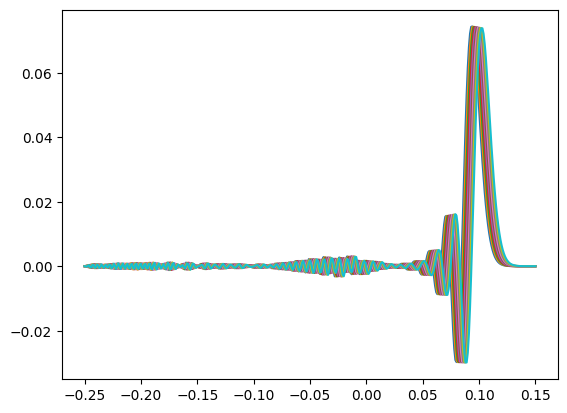

Centre of wave at 0.11100000000000032


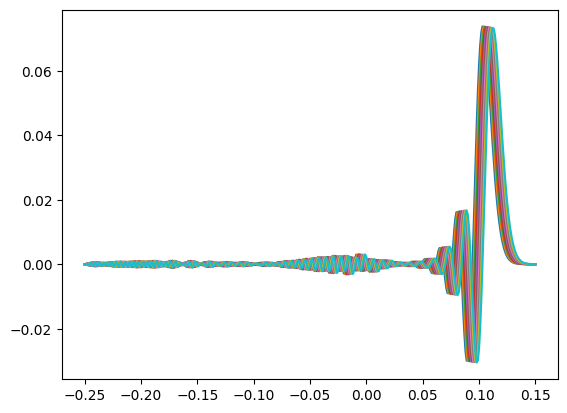

Centre of wave at 0.12100000000000033


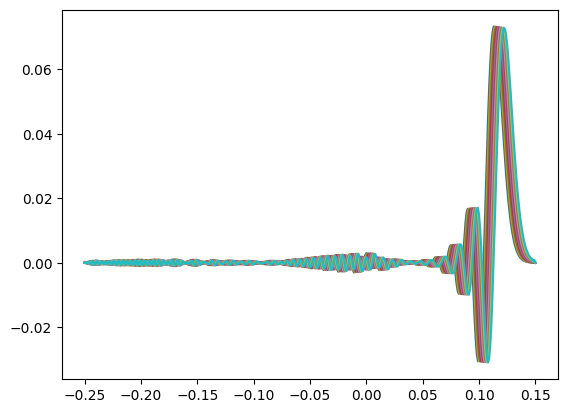

Centre of wave at 0.13100000000000034


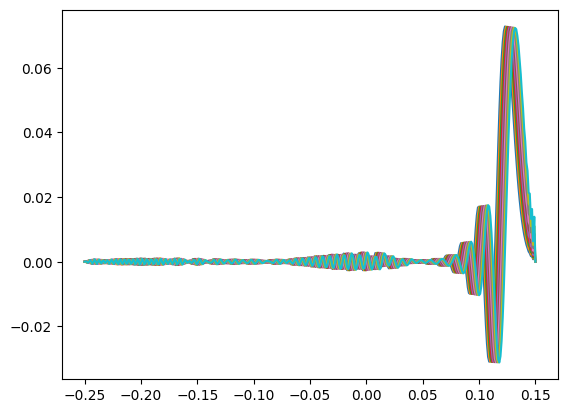

Centre of wave at 0.14300000000000035


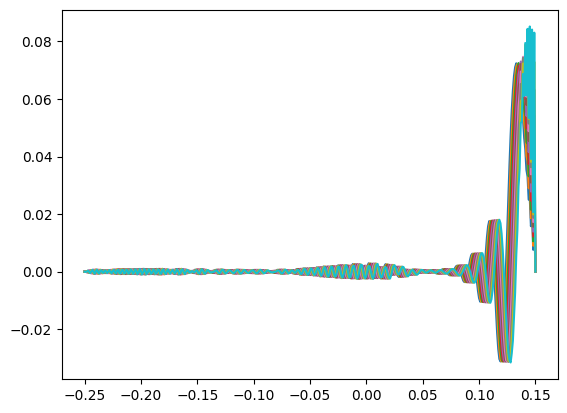

Centre of wave at 0.14900000000000035


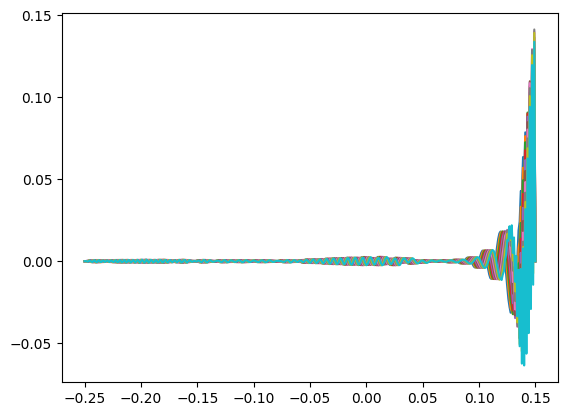

Centre of wave at 0.13700000000000034


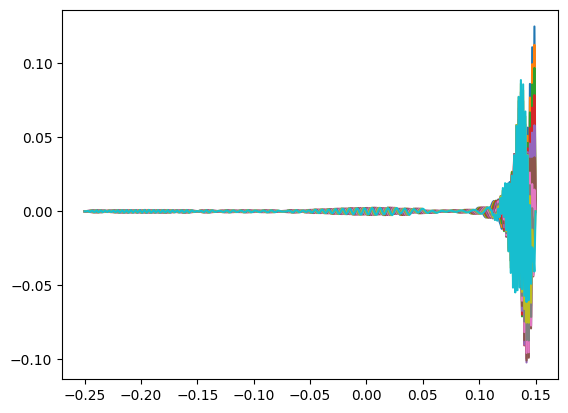

Centre of wave at 0.12900000000000034


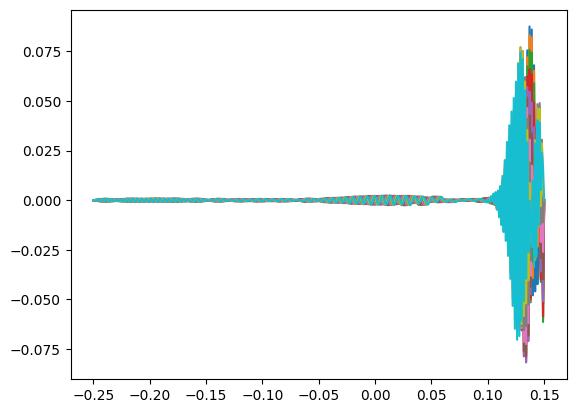

Centre of wave at 0.11900000000000033


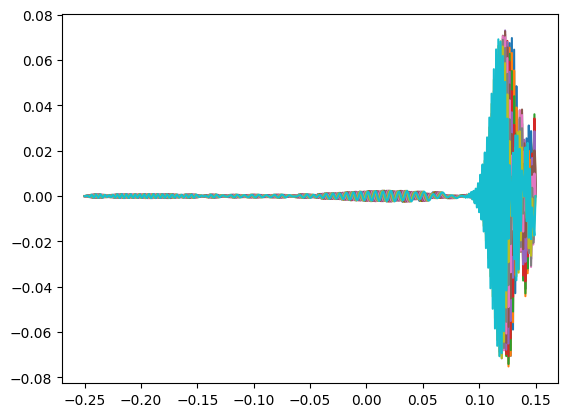

Centre of wave at 0.10900000000000032


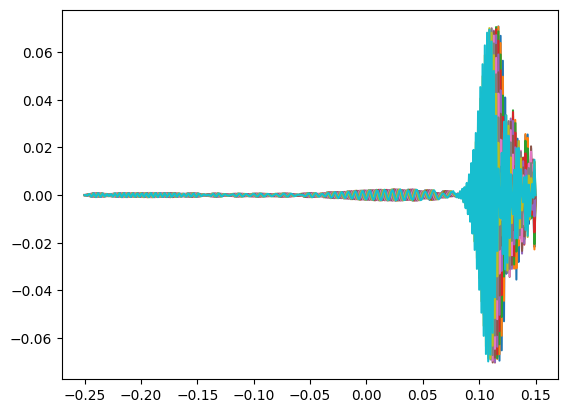

In [18]:
x_2  = np.arange(-0.25,0.15+dx_2,dx_2)
u_2 = np.zeros((x_2.shape[0], int((0.3-0)/dt_2)+1))
for i in range(u_2.shape[0]):
    u_2[i][0] = triangular_pulse_initial(x_2[i], x0_2, h0_2, w0_2)

plt.plot(x_2, u_2[:,0])
plt.show()


for j in range(u_2.shape[1]-1):
    
    dummy_b = np.zeros((x_2.shape[0],1))
    dummy_b[0][0] = 0
    dummy_b[x_2.shape[0]-1][0] = 0
    
    dummy_a = np.zeros((x_2.shape[0],x_2.shape[0]))
    dummy_a[0][0] = 1
    dummy_a[x_2.shape[0]-1][x_2.shape[0]-1] = 1
     
    for i in range(1, u_2.shape[0]-1):
        # Ensuring alpha=1 if center of pulse is on or to the left of origin, else alpha=2  
        if x_2[np.argmax(u_2[:,j])] <=0 :
            alpha_2 = 1
        else:
            alpha_2 = 2
        c_2 = alpha_2*dt_2/dx_2
                
        dummy_b[i] = (-c_2/4)*u_2[i+1][j] + (1)*u_2[i][j] + (c_2/4)*u_2[i-1][j]

        dummy_a[i][i-1] = -c_2/4
        dummy_a[i][i]   = 1
        dummy_a[i][i+1] = c_2/4
            
    ans_dummy = np.linalg.solve(dummy_a, dummy_b)
    u_2[:,j+1]=ans_dummy[:,0]
            
    plt.plot(x_2, u_2[:, j+1])
    if (j+1)%10 == 0 or x_2[np.argmax(u_2[:,j])] == 0:
        print("Centre of wave at", x_2[np.argmax(u_2[:,j])])
        plt.show()

## Question 4

In [43]:
def pulse_initial_4(x, x1, x2, a):
    if x1<=x<=x2:
        return a*(x-x1)*(x2-x)
    else:
        return 0

In [50]:
x1_4    = 0.4
x2_4    = 0.6
a_4     = 50
alpha_4 = -0.2
c_4     = 1

dx_4 = 0.001
dt_4 = abs(c_4*dx_4/alpha_4)

x_4  = np.arange(-0.5,1.5+dx_4,dx_4)

### FTBS

##### FTBS is unstable as alpha<0

##### Each plot contains graph of 10 time instants, scroll down to see plots at different time instants

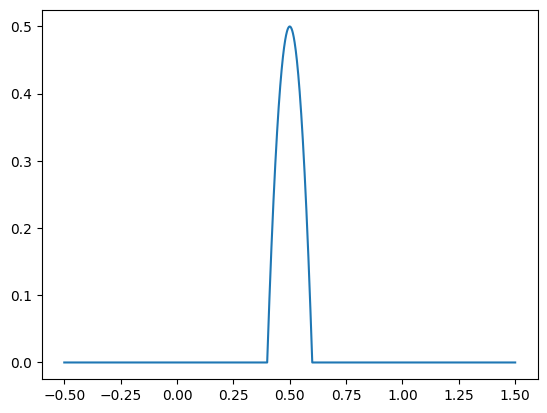

10


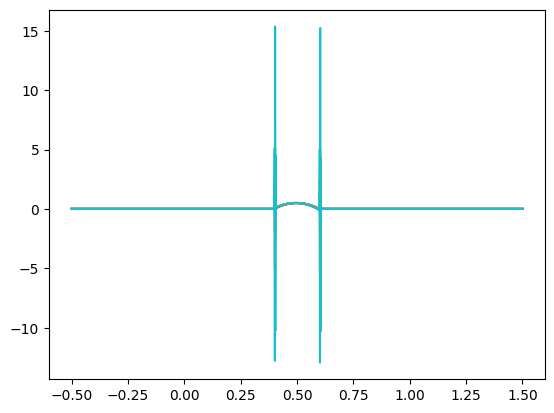

20


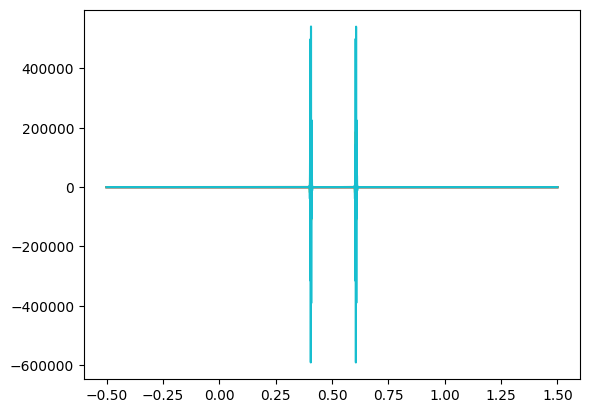

30


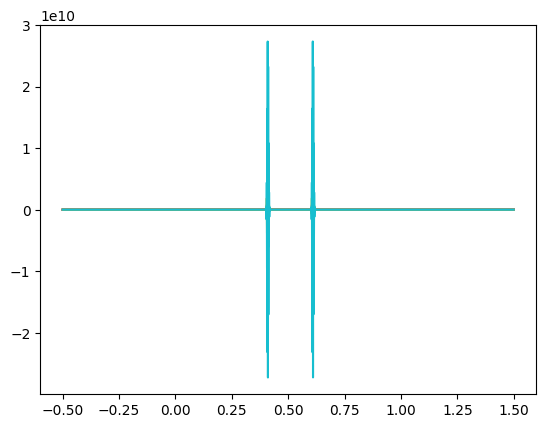

40


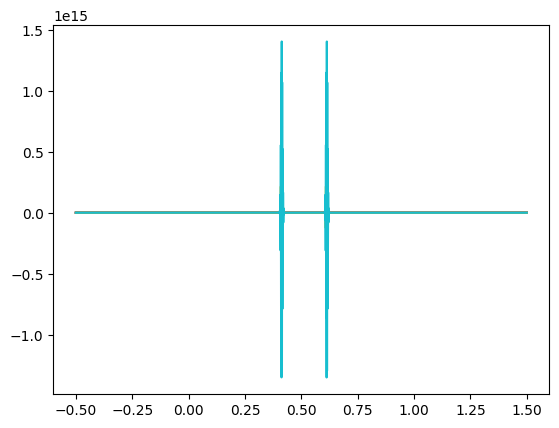

50


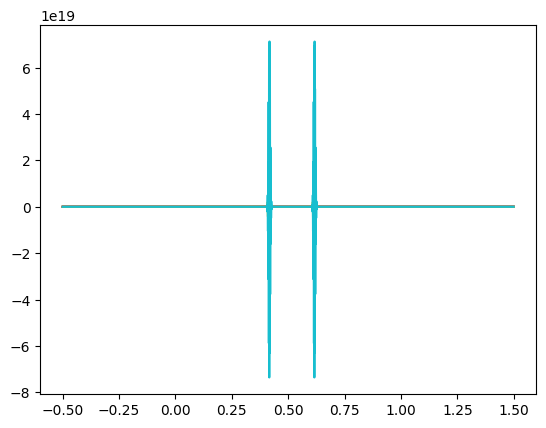

60


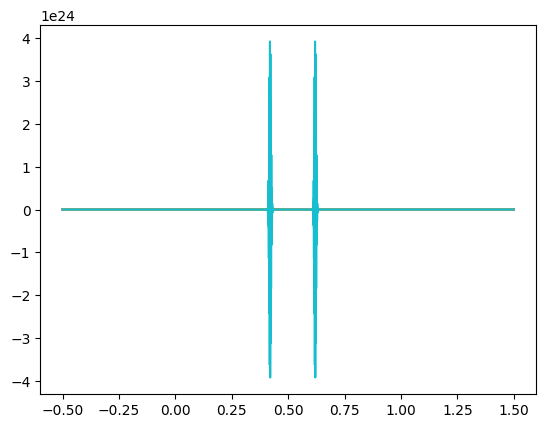

70


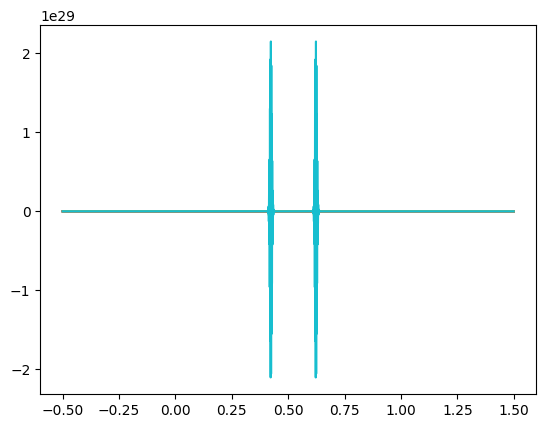

80


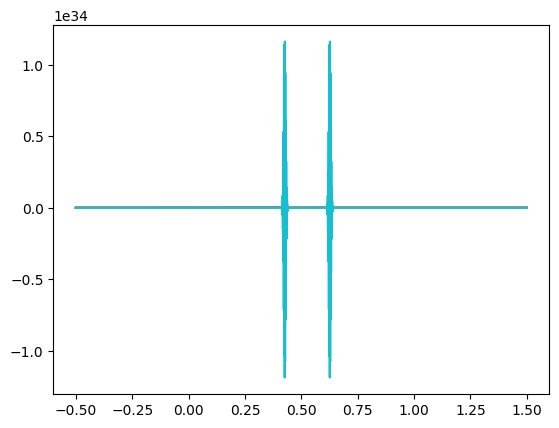

90


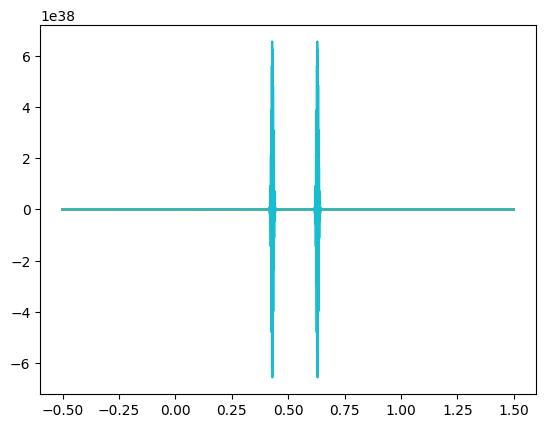

100


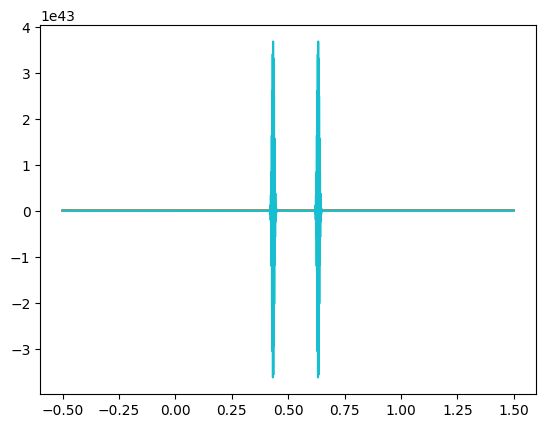

110


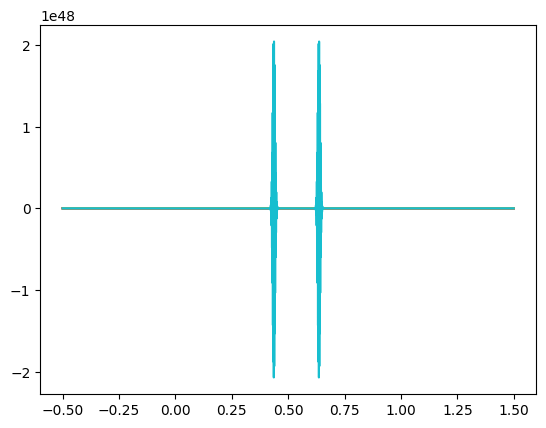

120


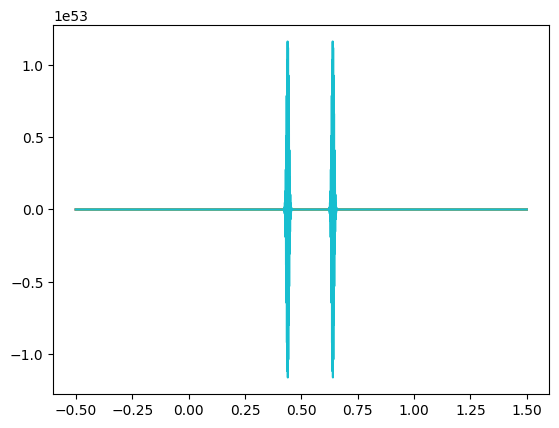

130


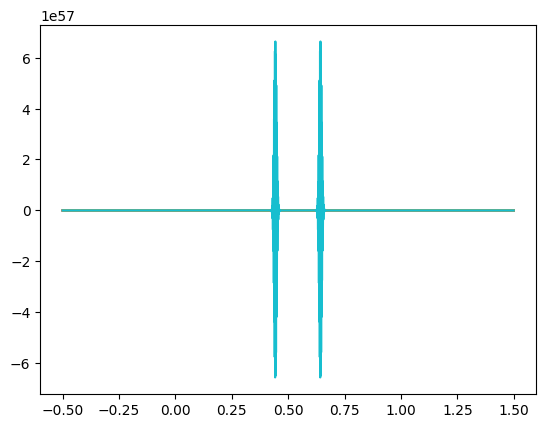

140


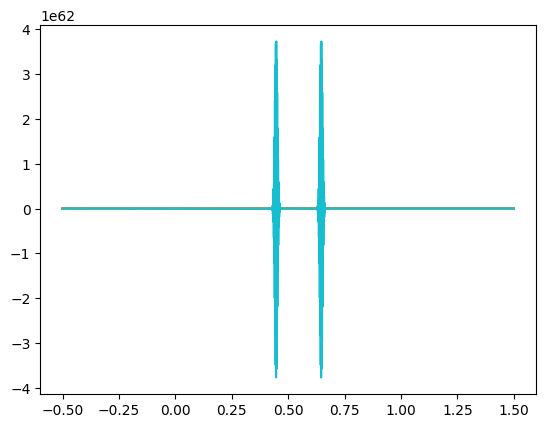

150


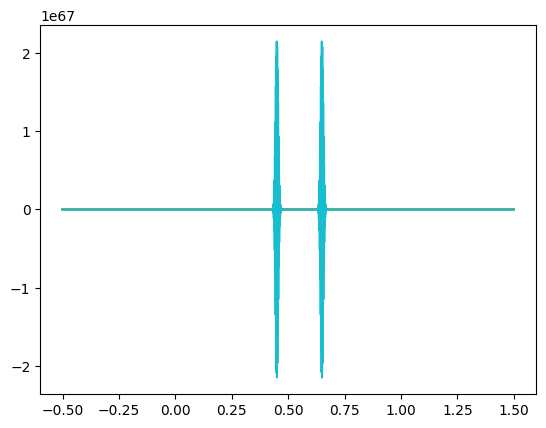

160


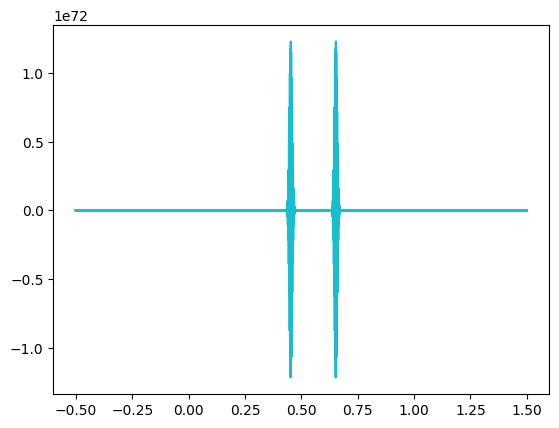

170


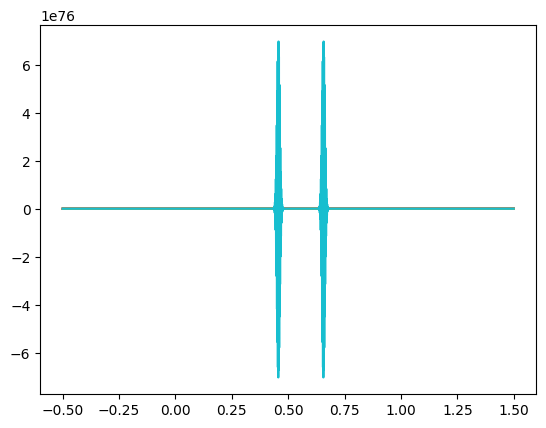

180


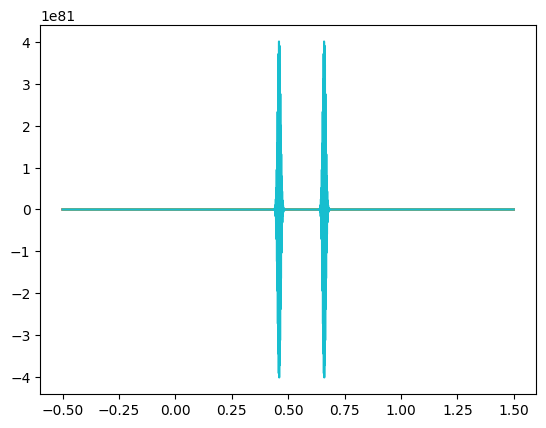

190


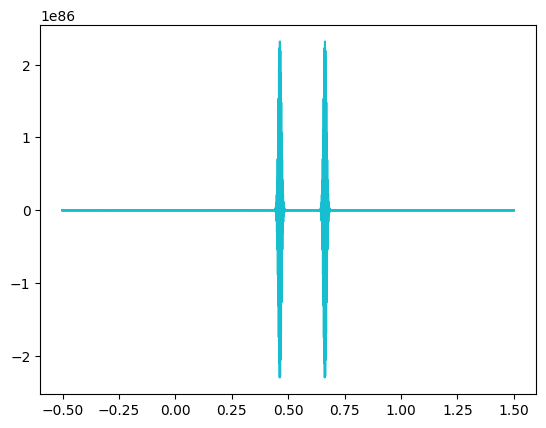

200


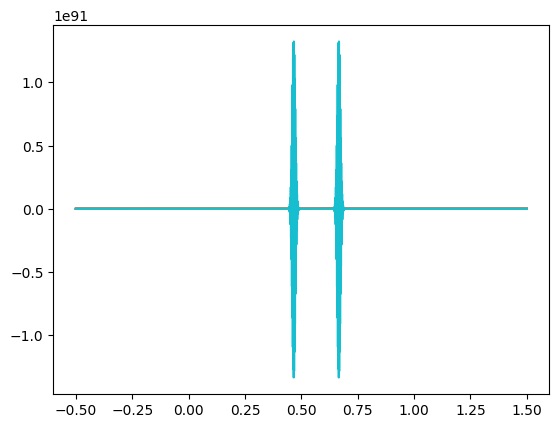

210


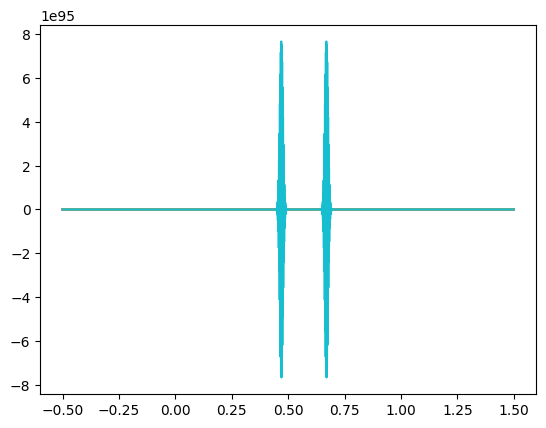

220


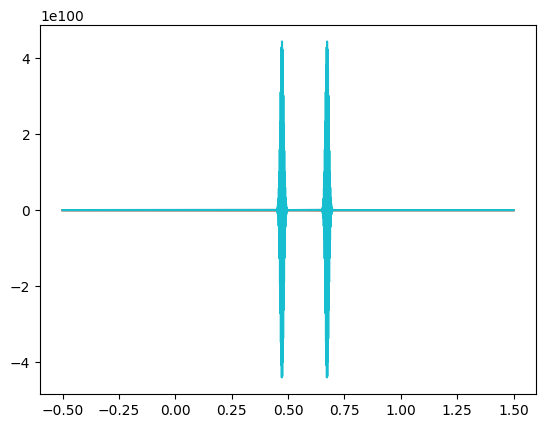

230


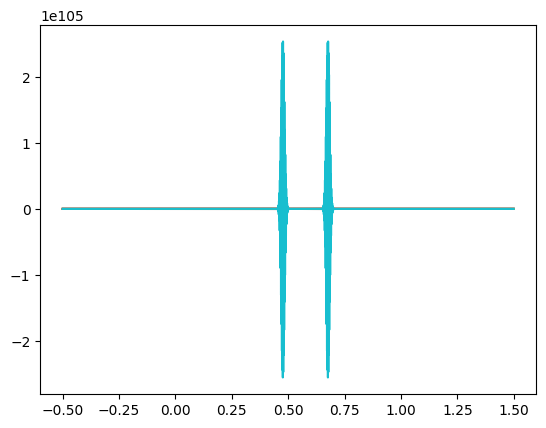

240


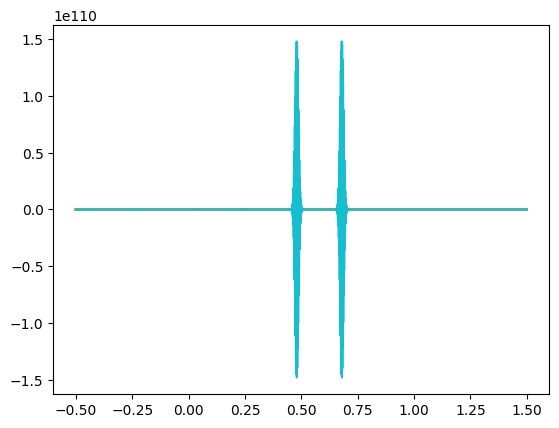

250


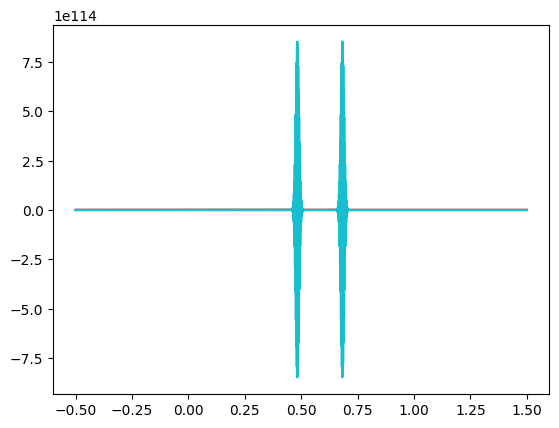

260


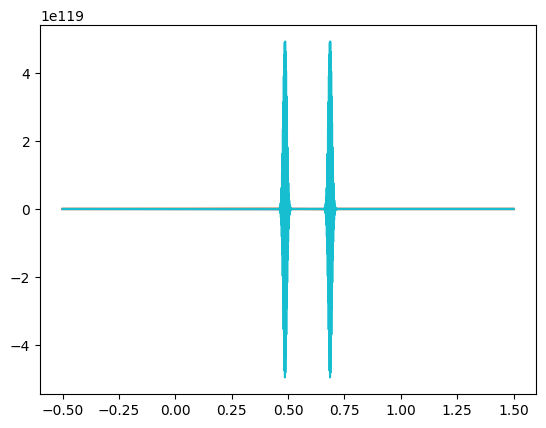

270


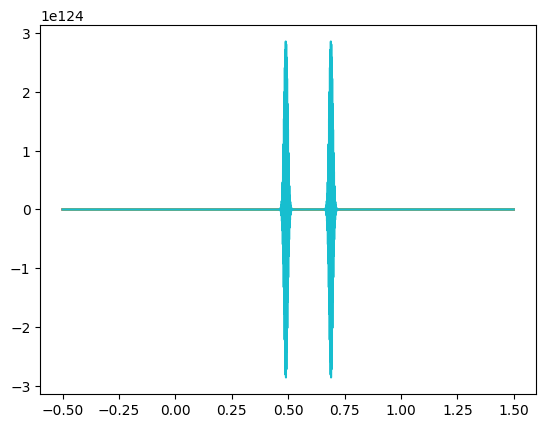

280


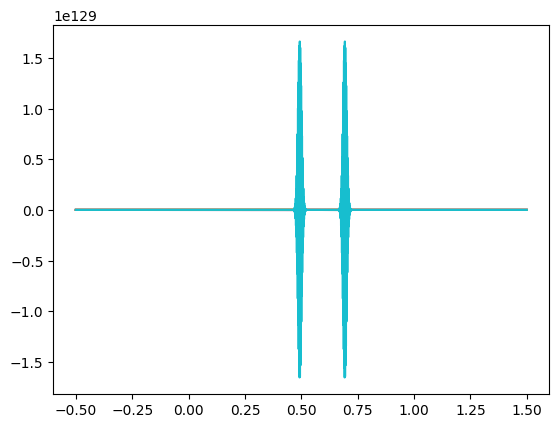

290


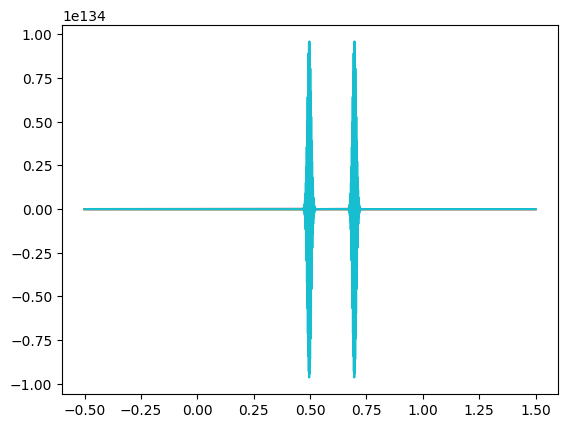

300


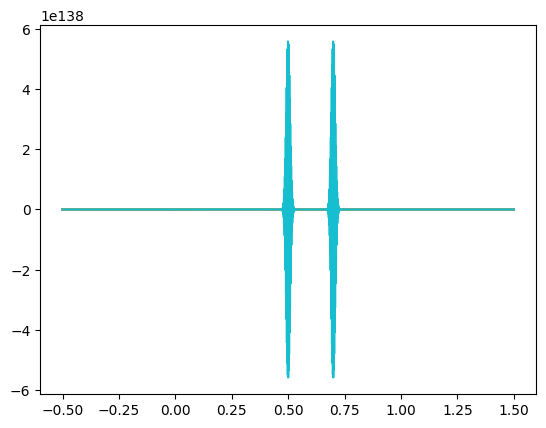

310


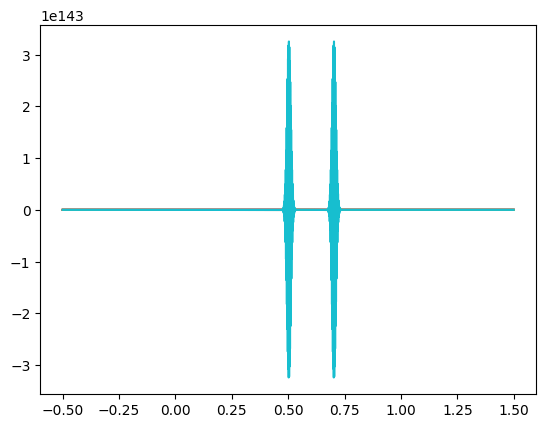

320


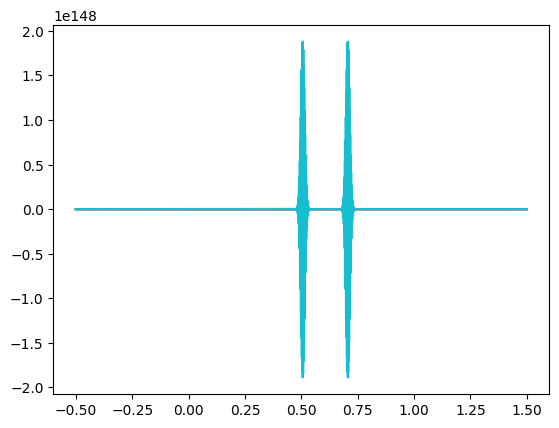

330


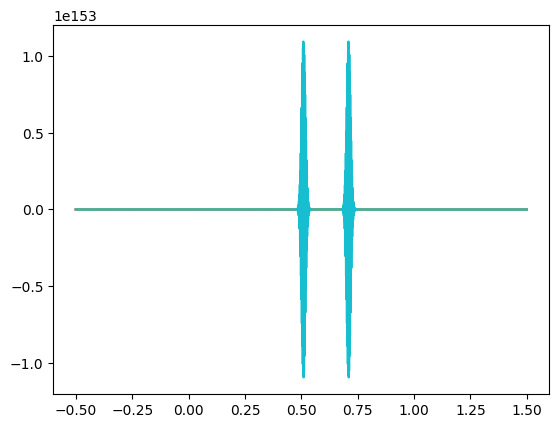

340


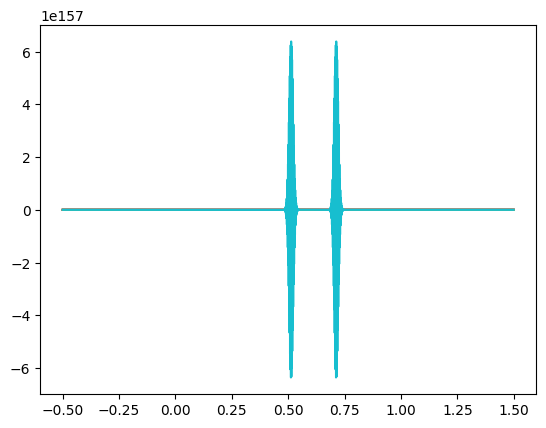

350


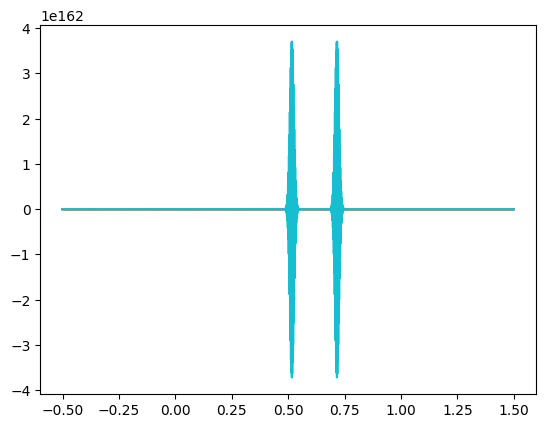

360


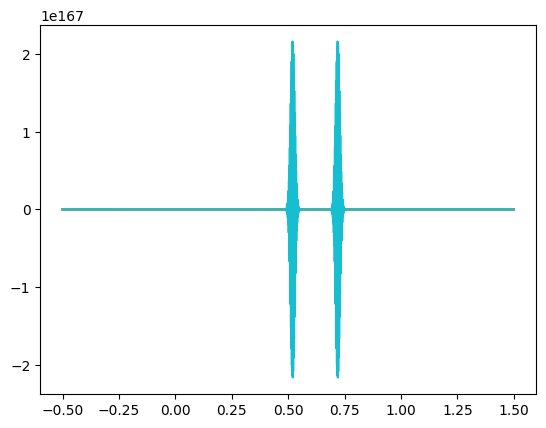

370


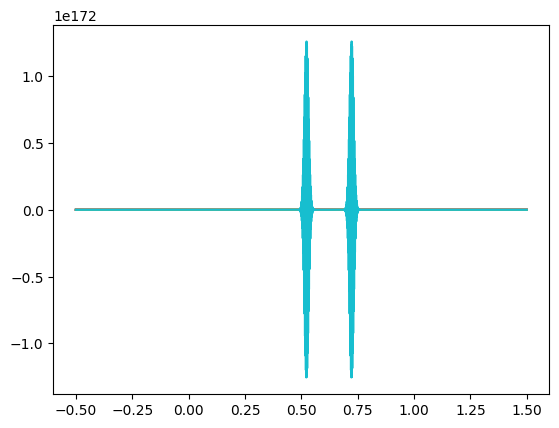

380


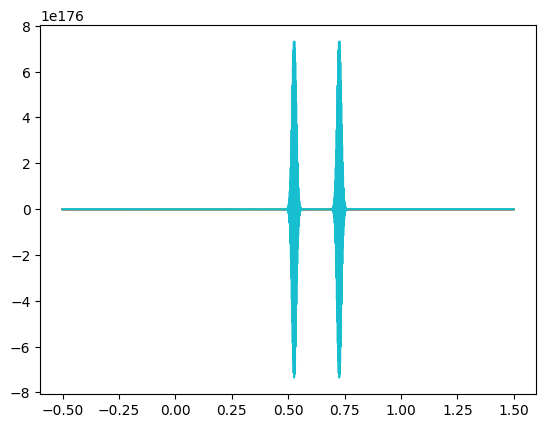

390


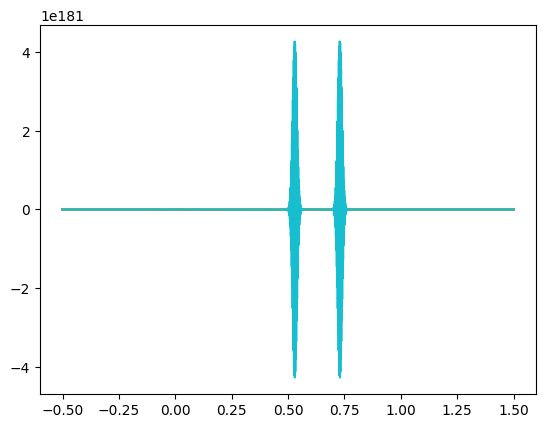

400


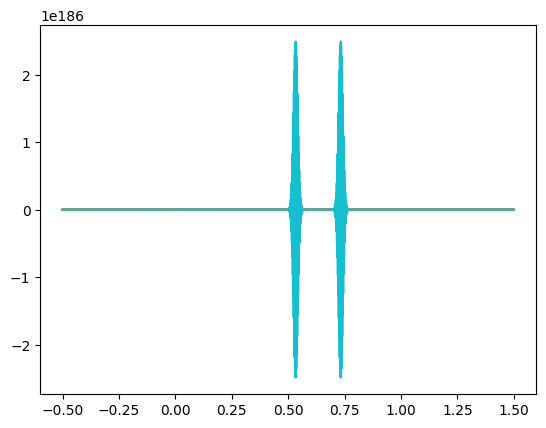

In [51]:
u_4_a = np.zeros((x_4.shape[0], int((2-0)/dt_4)+1))
for i in range(u_4_a.shape[0]):
    u_4_a[i][0] = pulse_initial_4(x_4[i], x1_4, x2_4, a_4)

plt.plot(x_4, u_4_a[:,0])
plt.show()

for j in range(u_4_a.shape[1]-1):
    for i in range(1, u_4_a.shape[0]):
        u_4_a[i][j+1] = (u_4_a[i][j]*(1-math.copysign(c_4, alpha_4))) + (u_4_a[i-1][j]*math.copysign(c_4, alpha_4))
    plt.plot(x_4, u_4_a[:, j])
    if (j+1)%10==0:
        print(j+1)
        plt.show()

### Crank Nicolson

##### As mentioned in question 2, oscillations in this schemes are accounted by Dispersive error 
##### As alpha<0, pulse moves left

##### Each plot contains graph of 15 time instants, scroll down to see plots at different time instants
##### See output of next cell for comparison b/w Exact and Numerical solution

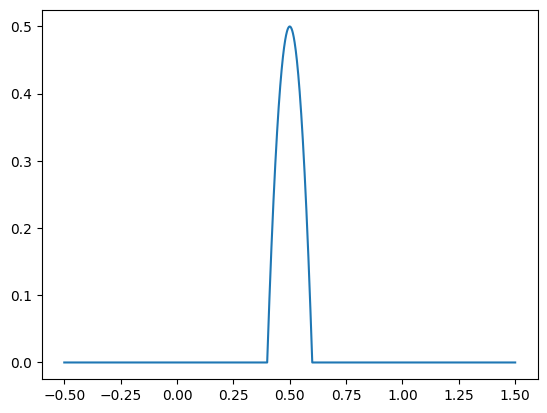

15


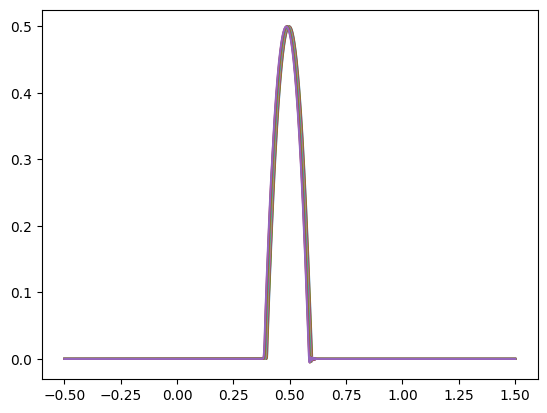

30


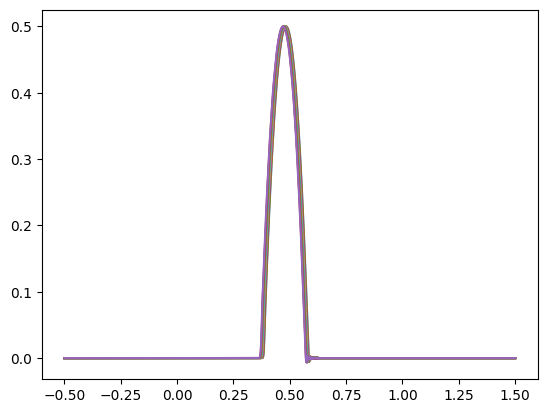

45


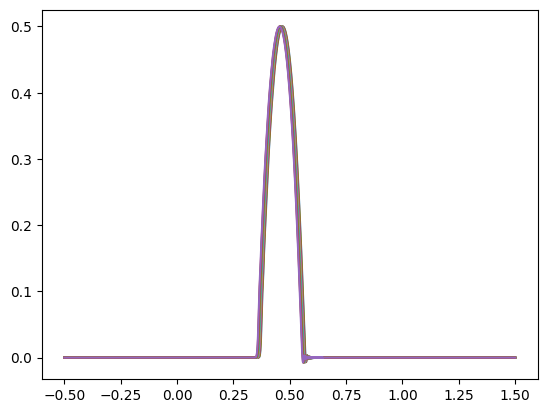

60


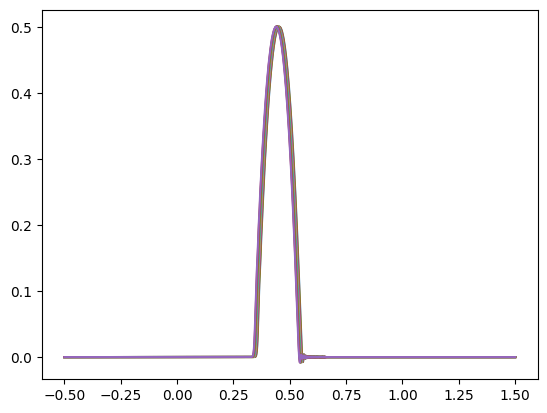

75


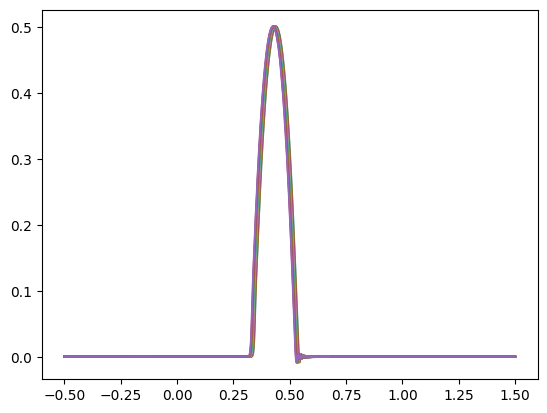

90


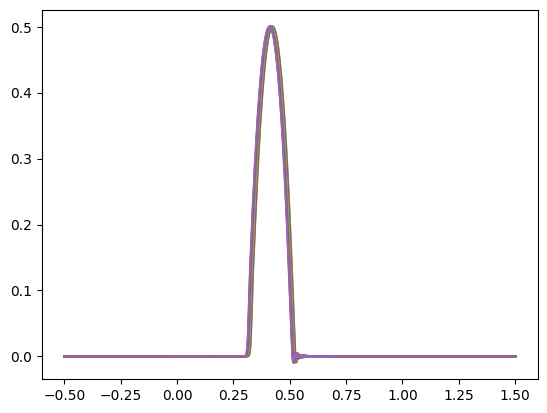

105


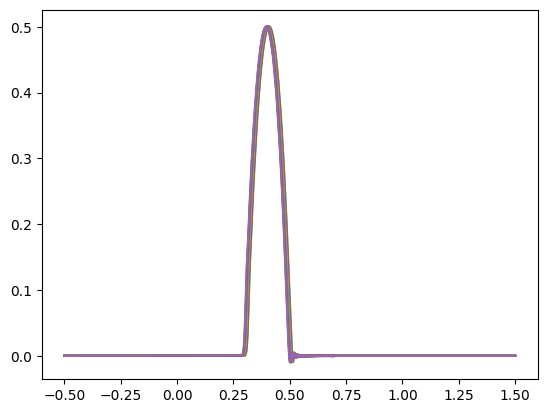

120


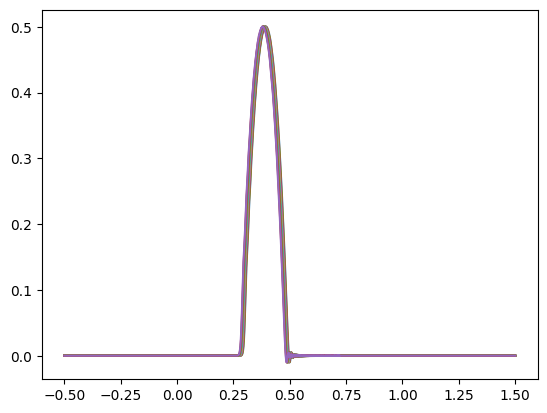

135


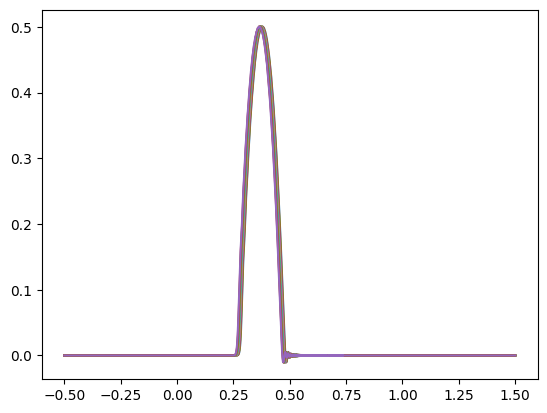

150


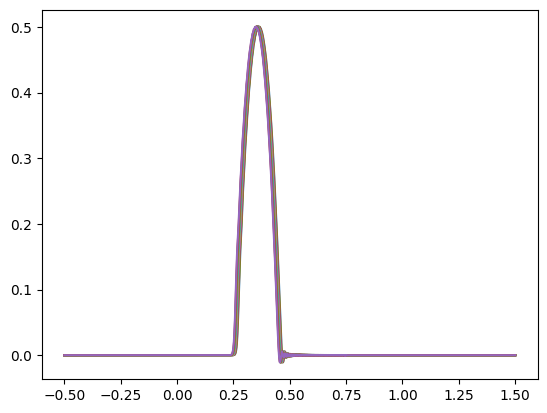

165


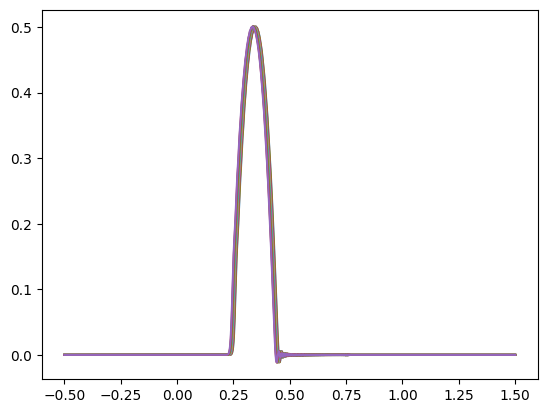

180


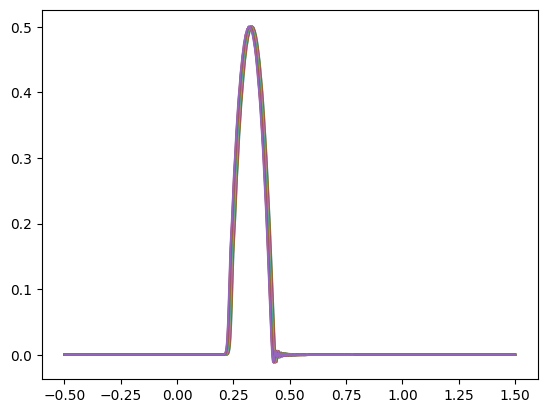

195


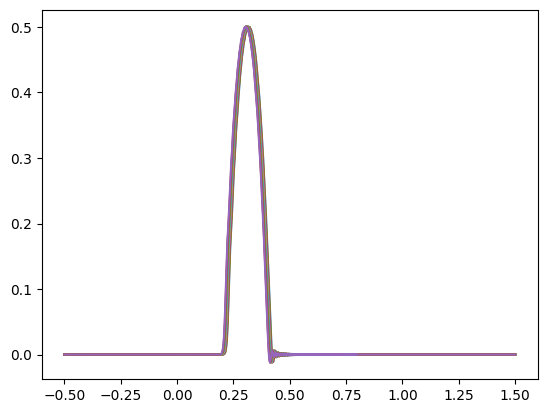

210


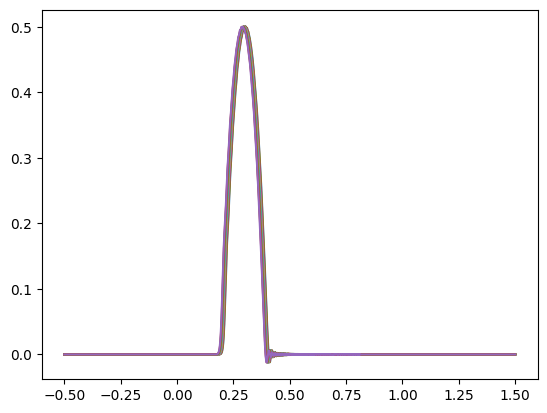

225


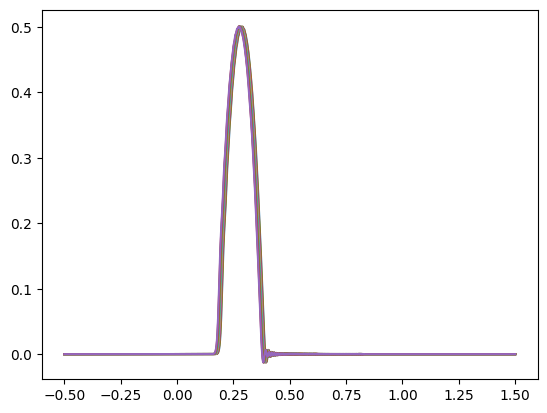

240


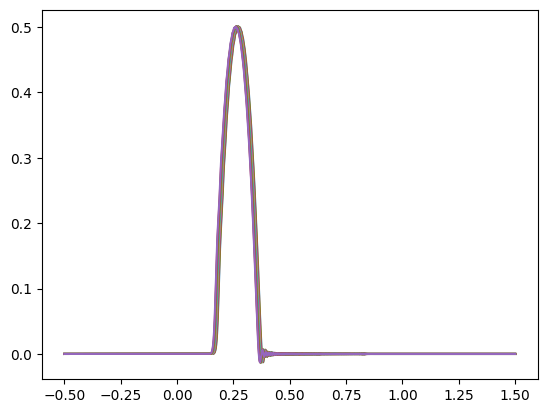

255


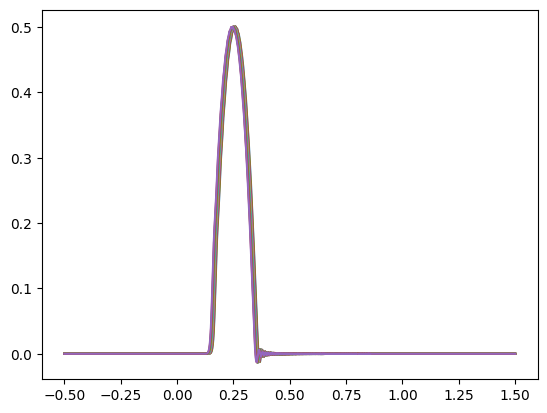

270


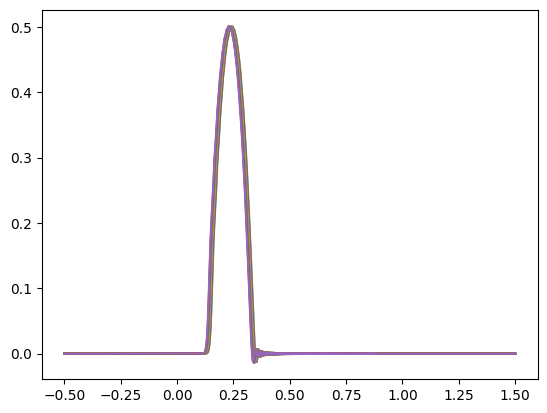

285


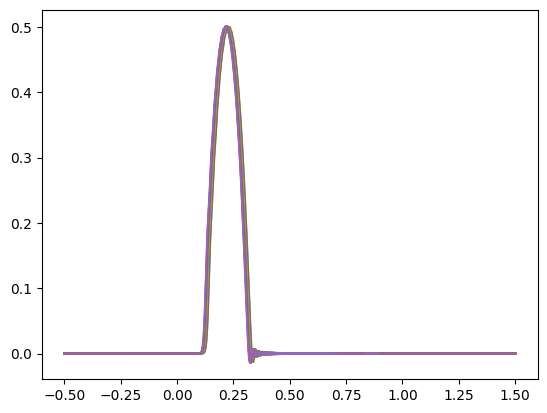

300


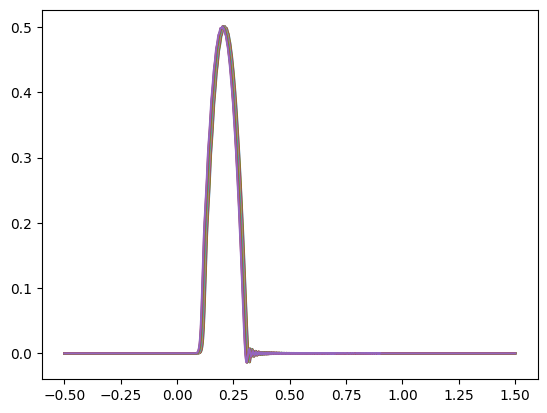

315


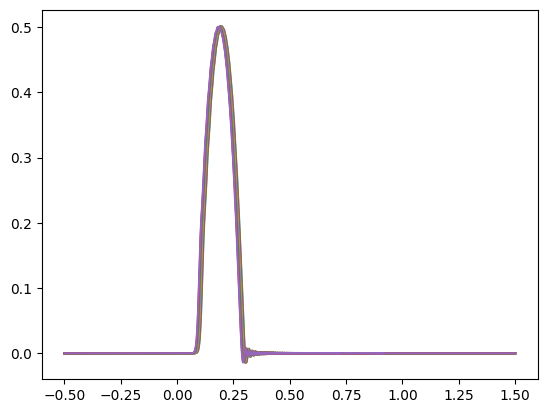

330


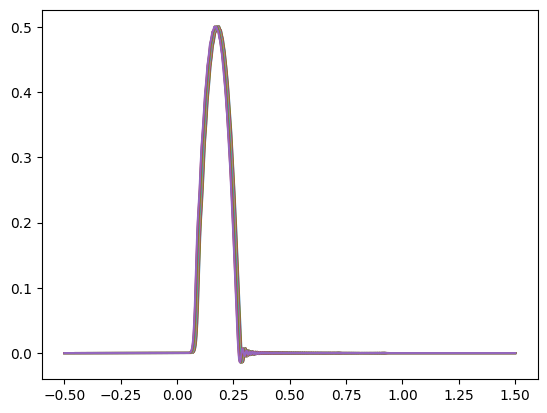

345


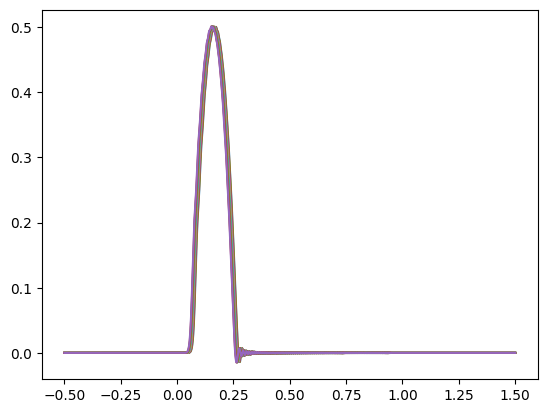

360


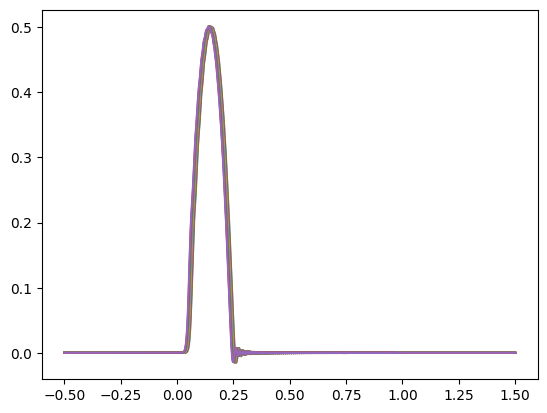

375


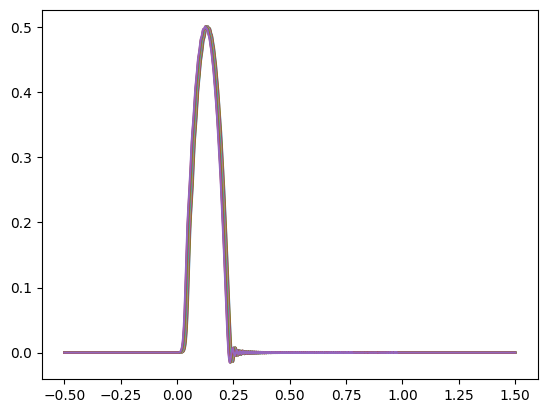

390


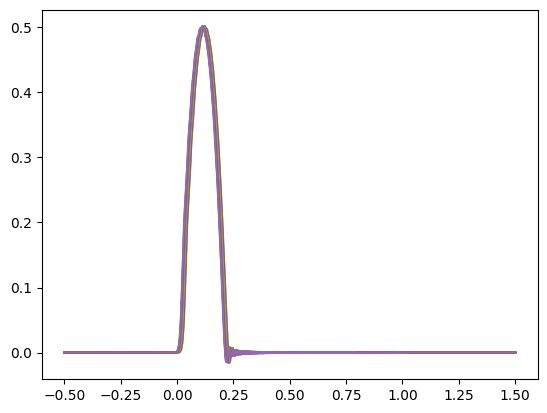

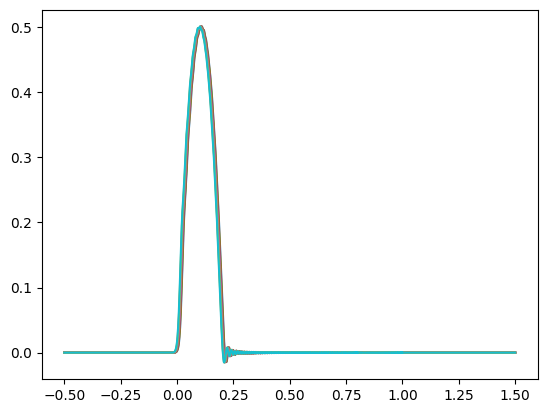

In [58]:
u_4_b = np.zeros((x_4.shape[0], int((2-0)/dt_4)+1))
for i in range(u_4_b.shape[0]):
    u_4_b[i][0] = pulse_initial_4(x_4[i], x1_4, x2_4, a_4)
    # print(u_4_b_a[i][0])

plt.plot(x_4, u_4_b[:,0])
plt.show()


for j in range(u_4_b.shape[1]-1):
    
    dummy_b = np.zeros((x_4.shape[0],1))
    dummy_b[0][0] = 0
    dummy_b[x_4.shape[0]-1][0] = 0
    
    dummy_a = np.zeros((x_4.shape[0],x_4.shape[0]))
    dummy_a[0][0] = 1
    dummy_a[x_4.shape[0]-1][x_4.shape[0]-1] = 1
     
    for i in range(1, u_4_b.shape[0]-1):                
        dummy_b[i] = (-math.copysign(c_4, alpha_4)/4)*u_4_b[i+1][j] + (1)*u_4_b[i][j] + (math.copysign(c_4, alpha_4)/4)*u_4_b[i-1][j]

        dummy_a[i][i-1] = -math.copysign(c_4, alpha_4)/4
        dummy_a[i][i]   = 1
        dummy_a[i][i+1] = math.copysign(c_4, alpha_4)/4
            
    ans_dummy = np.linalg.solve(dummy_a, dummy_b)
    u_4_b[:,j+1]=ans_dummy[:,0]
            
    plt.plot(x_4, u_4_b[:, j+1])
    if (j+1)%15 == 0:
        print(j+1)
        plt.show()

##### Exact solution is obtained by u(x+alpha*t,0)
##### We can clearly see that numerical solution by Crank Nicolson scheme overlaps exact solution for most region except at end of sine wine
##### This is clearly due to dispative errors obtained in Crank Nicolson scheme

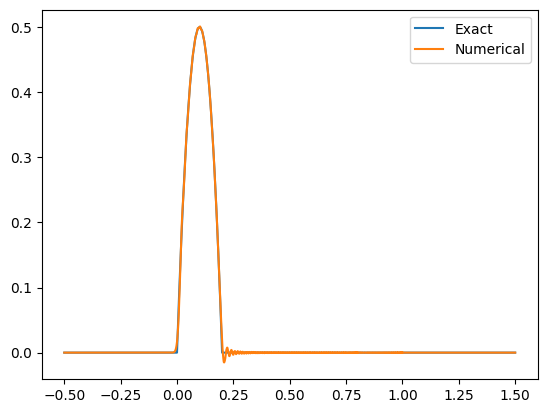

In [73]:
u_4_exact = np.zeros(x_4.shape[0])
for i in range(x_4.shape[0]):
    u_4_exact[i] = pulse_initial_4(x_4[i], x1_4+(alpha_4*2), x2_4+(alpha_4*2), a_4)

plt.plot(x_4, u_4_exact)
plt.plot(x_4, u_4_b[:, u_4_b.shape[1]-1])
plt.legend(["Exact", "Numerical"], bbox_to_anchor=(1,1))
plt.show()

## Question 5

##### In Burger's equation, Courant's number changes in every iteration as u changes
##### To maintain a stable solution, Courant's number should be less than or equal to 1
##### To ensure this, dt is set based on initial conditions and dx
##### If u_max*dt/dx<=1, then c<=1 for all u
##### Hence for each dx, dt = 1*dx/u_max

In [22]:
def pulse_initial_5(x):
    return (np.cos(3*np.pi*x/2)**2)*np.exp(-2*x)

In [23]:
c_5  = 1

dx_5 = [0.001, 0.002, 0.0004]
t_5  = [0.1, 0.5, 1]

##### Plot of u at required time instants are given below

dx=0.001  Time: 0.1


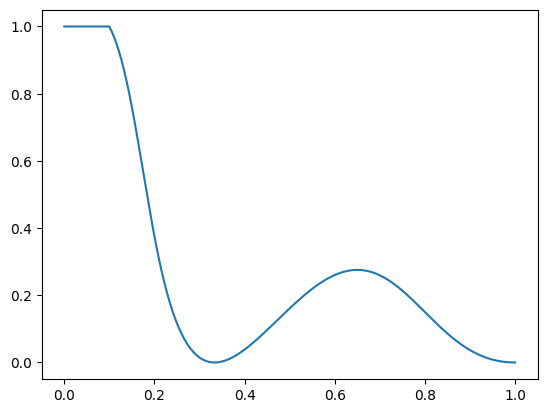

dx=0.002  Time: 0.5


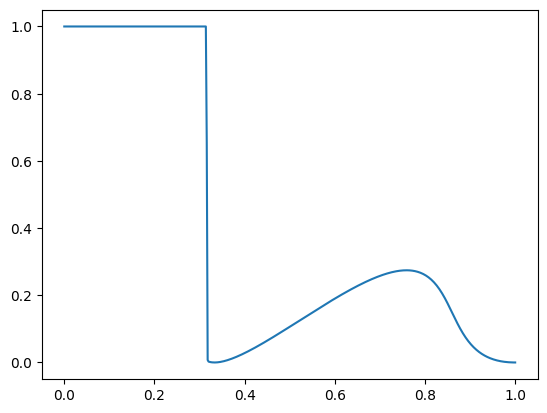

dx=0.0004  Time: 1.0


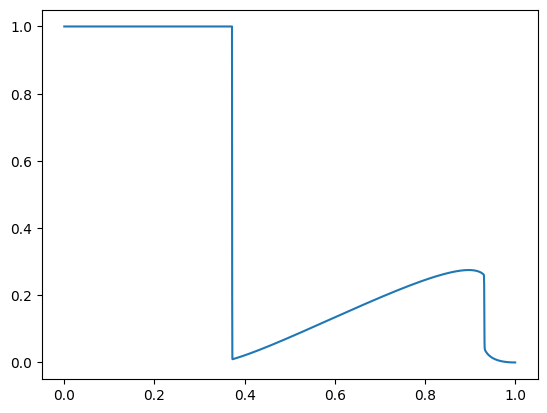

In [40]:
for k in range(len(dx_5)):    
    x_5 = np.arange(0,1+dx_5[k],dx_5[k])
    u_5_initial = np.zeros((x_5.shape[0],1))
    for i in range(u_5_initial.shape[0]):
        u_5_initial[i][0] = pulse_initial_5(x_5[i])
        
    dt_5 = 1*dx_5[k]/max(u_5_initial[:,0])
    u_5 = np.ones((x_5.shape[0], int((t_5[k]-0)/dt_5)+1))

    u_5[:,0] = u_5_initial[:,0]

    for j in range(u_5.shape[1]-1):
        for i in range(1, u_5.shape[0]):
            c_5 = u_5[i][j]*dt_5/dx_5[k]
    
            if c_5>=0:
                u_5[i][j+1] = (u_5[i][j]*(1-c_5)) + (u_5[i-1][j]*c_5)
            else:
                u_5[i][j+1] = (u_5[i][j]*(1+c_5)) - (u_5[i+1][j]*c_5)
        if j+1 == u_5.shape[1]-1:
            plt.plot(x_5, u_5[:, j+1])
            print(f"dx={dx_5[k]}  Time:", (j+1)*dt_5)
            plt.show()
            

## Question 3

In [31]:
def pulse_initial_3(x, x0, a0, w0):
    if abs(x-x0)<=w0/2:
        return -a0*np.cos(np.pi*x/w0)
    else:
        return 0

In [32]:
x0_3    = 0.5
a_3     = 0.5
w_3     = 0.1
alpha_3 = -0.2
c_3     = 1

dx_3 = 0.001
dt_3 = abs(c_3*dx_3/alpha_3)

x_3  = np.arange(0,1+dx_3,dx_3)

### Lax Friedrich Scheme

##### Plot at each time step is shown below
##### Numerical damping and oscillations are not seen in this scheme
##### Center of pulse moves left as alpha<0

Time Step: 0 Centre of pulse at: 0.5


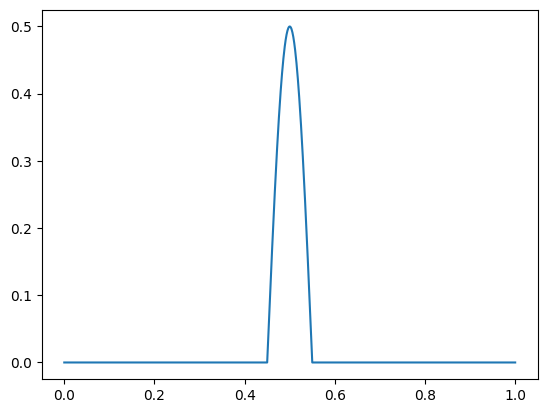

Time Step: 1 Centre of pulse at: 0.499


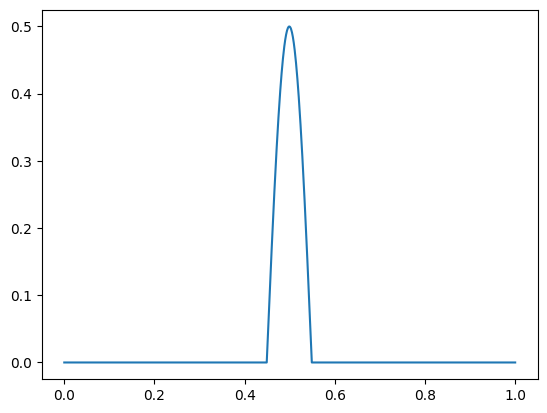

Time Step: 2 Centre of pulse at: 0.498


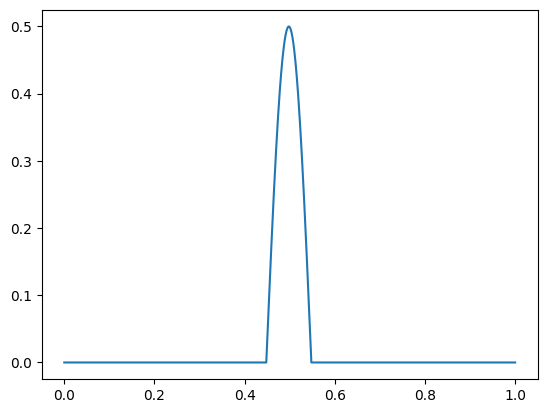

Time Step: 3 Centre of pulse at: 0.497


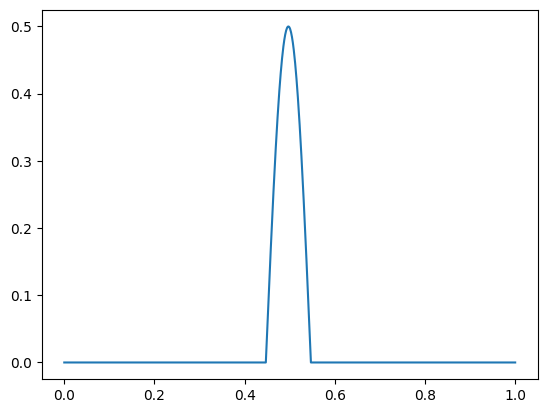

Time Step: 4 Centre of pulse at: 0.496


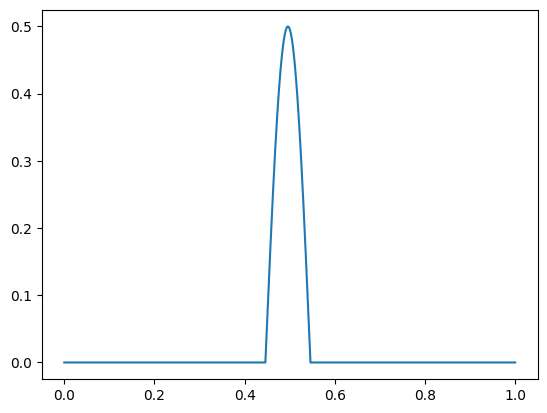

Time Step: 5 Centre of pulse at: 0.495


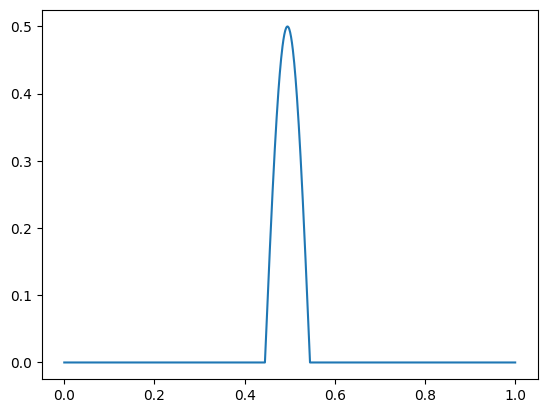

In [37]:
u_3_a = np.zeros((x_3.shape[0], 6))
for i in range(x_3.shape[0]):
    u_3_a[i][0] = pulse_initial_3(x_3[i], x0_3, a_3, w_3)

plt.plot(x_3, u_3_a[:,0])
print("Time Step:",0, "Centre of pulse at:",x_3[np.argmax(u_3_a[:,0])])
plt.show()

for j in range(u_3_a.shape[1]-1):
    for i in range(1, u_3_a.shape[0]-1):                
        u_3_a[i][j+1] = ((1-math.copysign(c_3, alpha_3))*u_3_a[i+1][j]/2) + ((1+math.copysign(c_3, alpha_3))*u_3_a[i-1][j]/2)
            
    plt.plot(x_3, u_3_a[:, j+1])
    print("Time Step:",j+1, "Centre of pulse at:",x_3[np.argmax(u_3_a[:,j+1])])
    plt.show()

### Explicit Upwind Scheme

##### Plot at each time step is shown below
##### Numerical damping and oscillations are not seen in this scheme
##### Center of pulse moves left as alpha<0
##### As alpha<0, explicit upwind scheme is FTFS scheme

Time Step: 0 Centre of pulse at: 0.5


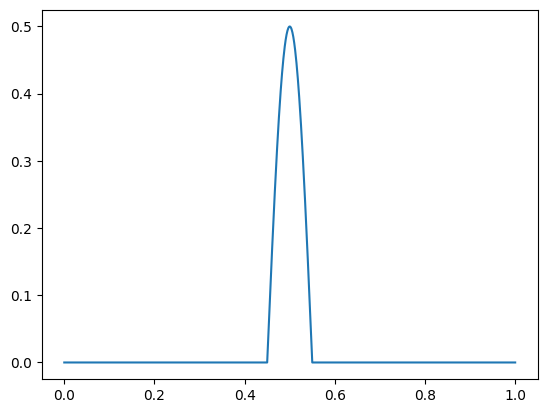

Time Step: 1 Centre of pulse at: 0.499


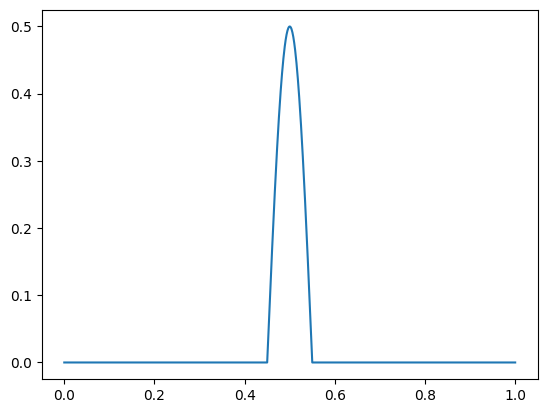

Time Step: 2 Centre of pulse at: 0.498


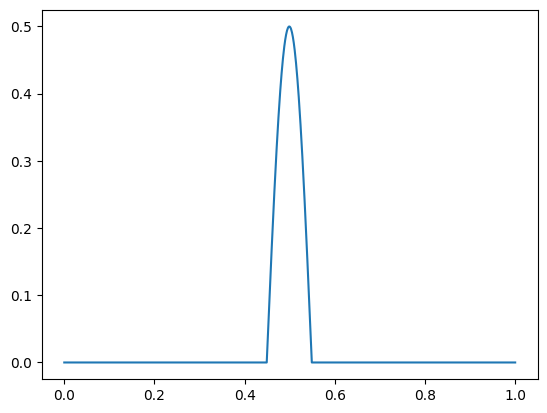

Time Step: 3 Centre of pulse at: 0.497


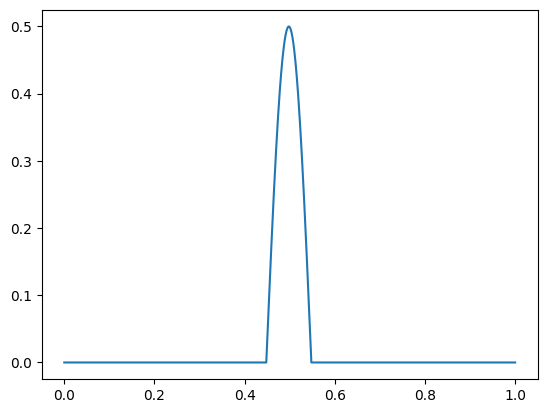

Time Step: 4 Centre of pulse at: 0.496


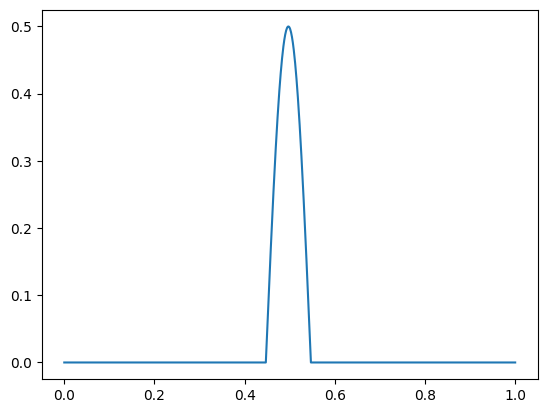

Time Step: 5 Centre of pulse at: 0.495


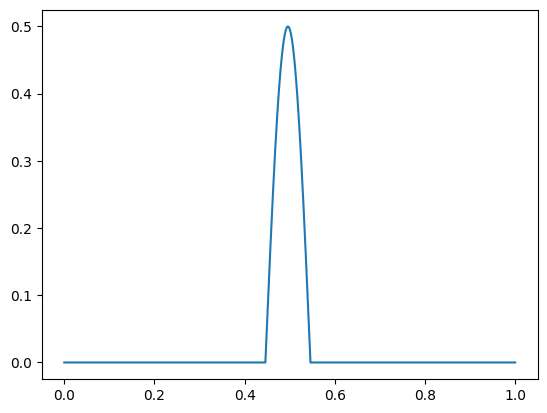

In [38]:
u_3_b = np.zeros((x_3.shape[0], 6))
for i in range(u_3_b.shape[0]):
    u_3_b[i][0] = pulse_initial_3(x_3[i], x0_3, a_3, w_3)

plt.plot(x_3, u_3_b[:,0])
print("Time Step:",0, "Centre of pulse at:",x_3[np.argmax(u_3_b[:,0])])
plt.show()

for j in range(u_3_b.shape[1]-1):
    for i in range(u_3_b.shape[0]-1):
        u_3_b[i][j+1] = (u_3_b[i][j]*(1+math.copysign(c_3, alpha_3))) - (u_3_b[i+1][j]*math.copysign(c_3, alpha_3))
    plt.plot(x_3, u_3_b[:, j])
    print("Time Step:",j+1, "Centre of pulse at:",x_3[np.argmax(u_3_b[:,j+1])])
    plt.show()